<a href="https://colab.research.google.com/github/adhang/data-science-digital-skola/blob/update/99.%20Final%20Project/Modeling%20Clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Prediction
Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

**Context**
- The telco customer churn data contains customer information from a fictional telco company
- This company provides various services such as streaming, phone, and internet services
<br><br>

**Problem Background**
- Customer churn is one of the biggest problems in the telecommunications industry
- By definition, customer churn is when customers stop interacting (subscribe) with the company
- Companies need to invest (expense costs) to get new customers
- When a customer leaves the service (churns), it indicates a loss of investment
- Cost, time, and effort need to be channelled to replace customers who have left the service
- Acquiring new customers is often more difficult and more expensive than retaining existing customers
- On Hardvard Business Review [page](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers), they said: acquiring a new customer is anywhere from five to 25 times more expensive than retaining an existing one
<br><br>

**Objectives**
- Predict whether customers will continue to use the service or will leave the service
- Understand the customer behaviors: what keeps customers using the service and what makes them leave the service
<br><br>

**Contents**
1. Dataset Information
2. Importing Libraries
3. Dataset Overview
4. Dataset Overview - Function
5. Exploratory Data Analysis
6. Data Preprocessing

# 1. Dataset Information
This dataset comes from Kaggle, you can find it here: [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn).
<br><br>
This dataset is used to predict behavior to retain customers. Each row represents a customer, and each column contains customer's attribute.
<br><br>
**Attribute Information**
- Identifier
  - `customerID` - ID number of the customer

- Target Variable
  - `Churn` - Churn status, whether the customer churned or not

- Demographic information
  - `gender` - Whether the customer is a male or a female
  - `SeniorCitizen` - Whether the customer is a senior citizen or not
  - `Partner` - Whether the customer has a partner or not
  - `Dependents` - Whether the customer has dependents or not

- Customer account information
  - `tenure` - Number of months the customer has used the service
  - `Contract` - The contract term of the customer
  - `PaperlessBilling` - Whether the customer has paperless billing or not
  - `PaymentMethod` - The customer’s payment method
  - `MonthlyCharges` - The amount charged to the customer monthly
  - `TotalCharges` - The total amount charged to the customer
  
- Services that each customer has signed up for
  - `PhoneService` - Whether the customer has a phone service or not
  - `MultipleLines` - Whether the customer has multiple lines or not
  - `InternetService` - Customer’s internet service provider
  - `OnlineSecurity` - Whether the customer has online security or not
  - `OnlineBackup` - Whether the customer has online backup or not
  - `DeviceProtection` - Whether the customer has device protection or not
  - `TechSupport` - Whether the customer has tech support or not
  - `StreamingTV` - Whether the customer has streaming TV or not
  - `StreamingMovies` - Whether the customer has streaming movies or not
<br><br>

**Note:** Since this dataset is using `CamelCase` format for the column names, for this project, I will convert it to `snake_case` format.

- kalo di dunia kerja, konten dari dashboard/ report itu dari kita sendiri (BI/ DA) atau di-request oleh pihak lain? misal dari orang bisnis.

- BI tools kan cukup mahal, itu nanti pasti disediain oleh perusahaan kan mas? kalo iya, berarti nanti BI/ DA harus pakai perangkat dari kantor(?)

# 2. Importing Libraries

In [ ]:
!pip install --upgrade matplotlib
!pip install --upgrade seaborn
# !pip install xgboost
# !pip install lightgbm
!pip install catboost

!pip install inflection
!pip install dython
!pip install shap

# !pip install bayesian-optimization
# from bayes_opt import BayesianOptimization

In [ ]:
# association between attributes
from dython.nominal import associations

# basic
import pandas as pd
import numpy as np

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})
# I change the maximum width in characters of a column (default: 50)
pd.set_option('display.max_colwidth', None)

# explainable AI
import shap

# CamelCase to snake_case format
import inflection

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import ADASYN

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

# model evaluation & tuning hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# 4. Dataset Overview - Function

In [2]:
#@title Just Run This Function

def get_camel_case(data):
  # renaming column
  column_list = list(data.columns)

  for i, col in enumerate(column_list):
    column_list[i] = inflection.underscore(column_list[i]).replace(' ', '_')

  return column_list

def get_data_type(data, column_list_numerical):
  # general data type
  data_type_general = dict()

  for col in data.columns:
    if col in column_list_numerical:
      data_type_general[col] = 'numerical'
    else:
      data_type_general[col] = 'categorical'

  tmp = pd.Series(data_type_general)
  data_type_general = pd.DataFrame(tmp).T.rename({0:'general data types'})
  
  # pythonic data type
  data['total_charges'] = pd.to_numeric(data['total_charges'], errors='coerce')
  data['total_charges'].fillna(0, inplace=True)
  data['total_charges'] = data['total_charges'].astype(float)

  data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})

  return data_type_general, data_type_python

def get_data_variation(data, column_list_numerical, column_list_categorical):
  # numerical data variation
  variation_numerical = dict()

  for col in column_list_numerical:
    tmp = f'{data[col].min()} - {data[col].max()}'
    variation_numerical[col] = tmp

  tmp = pd.Series(variation_numerical)
  data_variation_numerical = pd.DataFrame(tmp).T.rename({0:'data variation'})

  # categorical data variation
  variation_categorical = dict()

  for col in column_list_categorical:
    tmp = data[col].unique().tolist()
    tmp.sort()
    variation_categorical[col] = ', '.join(str(item) for item in tmp)

  tmp = pd.Series(variation_categorical)
  data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})

  # overall data variation
  data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)

  return data_variation

def get_dataset_overview(data):
  #  replace redundant value
  data.replace({'No phone service':'No',
              'No internet service':'No'},
             inplace=True)
  
  # renaming column
  column_list = get_camel_case(data)
  data.columns = column_list

  # total duplicated values
  # print('Total duplicated values:', data.duplicated().sum())

  # dropping column 
  data.drop('customer_id', axis=1, inplace=True)

  # column list
  column_list_numerical = ['tenure', 'monthly_charges', 'total_charges']
  column_list_categorical = list(data.columns)
  column_list_categorical.remove('tenure')
  column_list_categorical.remove('monthly_charges')
  column_list_categorical.remove('total_charges')

  # data type
  data_type_general, data_type_python = get_data_type(data, column_list_numerical)

  # total data
  data_count = pd.DataFrame(data.count()).T.rename({0:'total data'})

  # total null values
  data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total null'})

  # percentage of null values
  data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage null'})

  # data variation
  data_variation = get_data_variation(data, column_list_numerical, column_list_categorical)

  data_info = pd.concat([data_type_general, data_type_python,
                       data_count, data_null_total,
                       data_null_percentage.round(2), data_variation],
                      axis=0)

  data_info = data_info.reindex(data.columns, axis=1)

  return data, data_info

In [3]:
#@title And Then Run This
path = 'https://raw.githubusercontent.com/adhang/datasets/main/telco-customer-churn.csv'

data = pd.read_csv(path)
data, data_info = get_dataset_overview(data)

# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

# only contains input features
column_categorical.remove('churn')

In [ ]:
data.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data_info

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
general data types,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numerical,numerical,categorical
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object
total data,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
total null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
percentage null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
data variation,"Female, Male","0, 1","No, Yes","No, Yes",0 - 72,"No, Yes","No, Yes","DSL, Fiber optic, No","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check",18.25 - 118.75,0.0 - 8684.8,"No, Yes"


# EDA

In [ ]:
def count_plot(data, x, ax, hue=None):
  sns.countplot(data=data, x=x, hue=hue, ax=ax)
  
  if hue != None:
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title=hue)
  
  # ax.set_title(x.replace("_", " "))
  ax.set_title(x)
  ax.set_xlabel('')  
  # ax.set_ylabel('')
  sns.despine()

In [ ]:
def stacked_bar_plot(data, x, y, ax):
  crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index')

  crosstab.plot(kind='bar', stacked=True, ax=ax)

  # ax.set_title(x.replace("_", " "))
  ax.set_title(x)
  ax.set_xlabel('')
  ax.set_ylabel('proportion')
  ax.set_yticks(np.linspace(0,1,11))

  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=y) # 1 = x-right, 0.5 = y-center

  for n, x in enumerate(crosstab.index):
    for (proportion, y_loc) in zip(crosstab.loc[x], crosstab.loc[x].cumsum()):
      ax.text(x=n,
              y=(y_loc - proportion) + (proportion / 2),
              s=f'{np.round(proportion * 100, 1)}%',
              color='white',
              fontsize=14,
              fontweight='bold',
              horizontalalignment='center',
              verticalalignment='center')
  
  sns.despine()

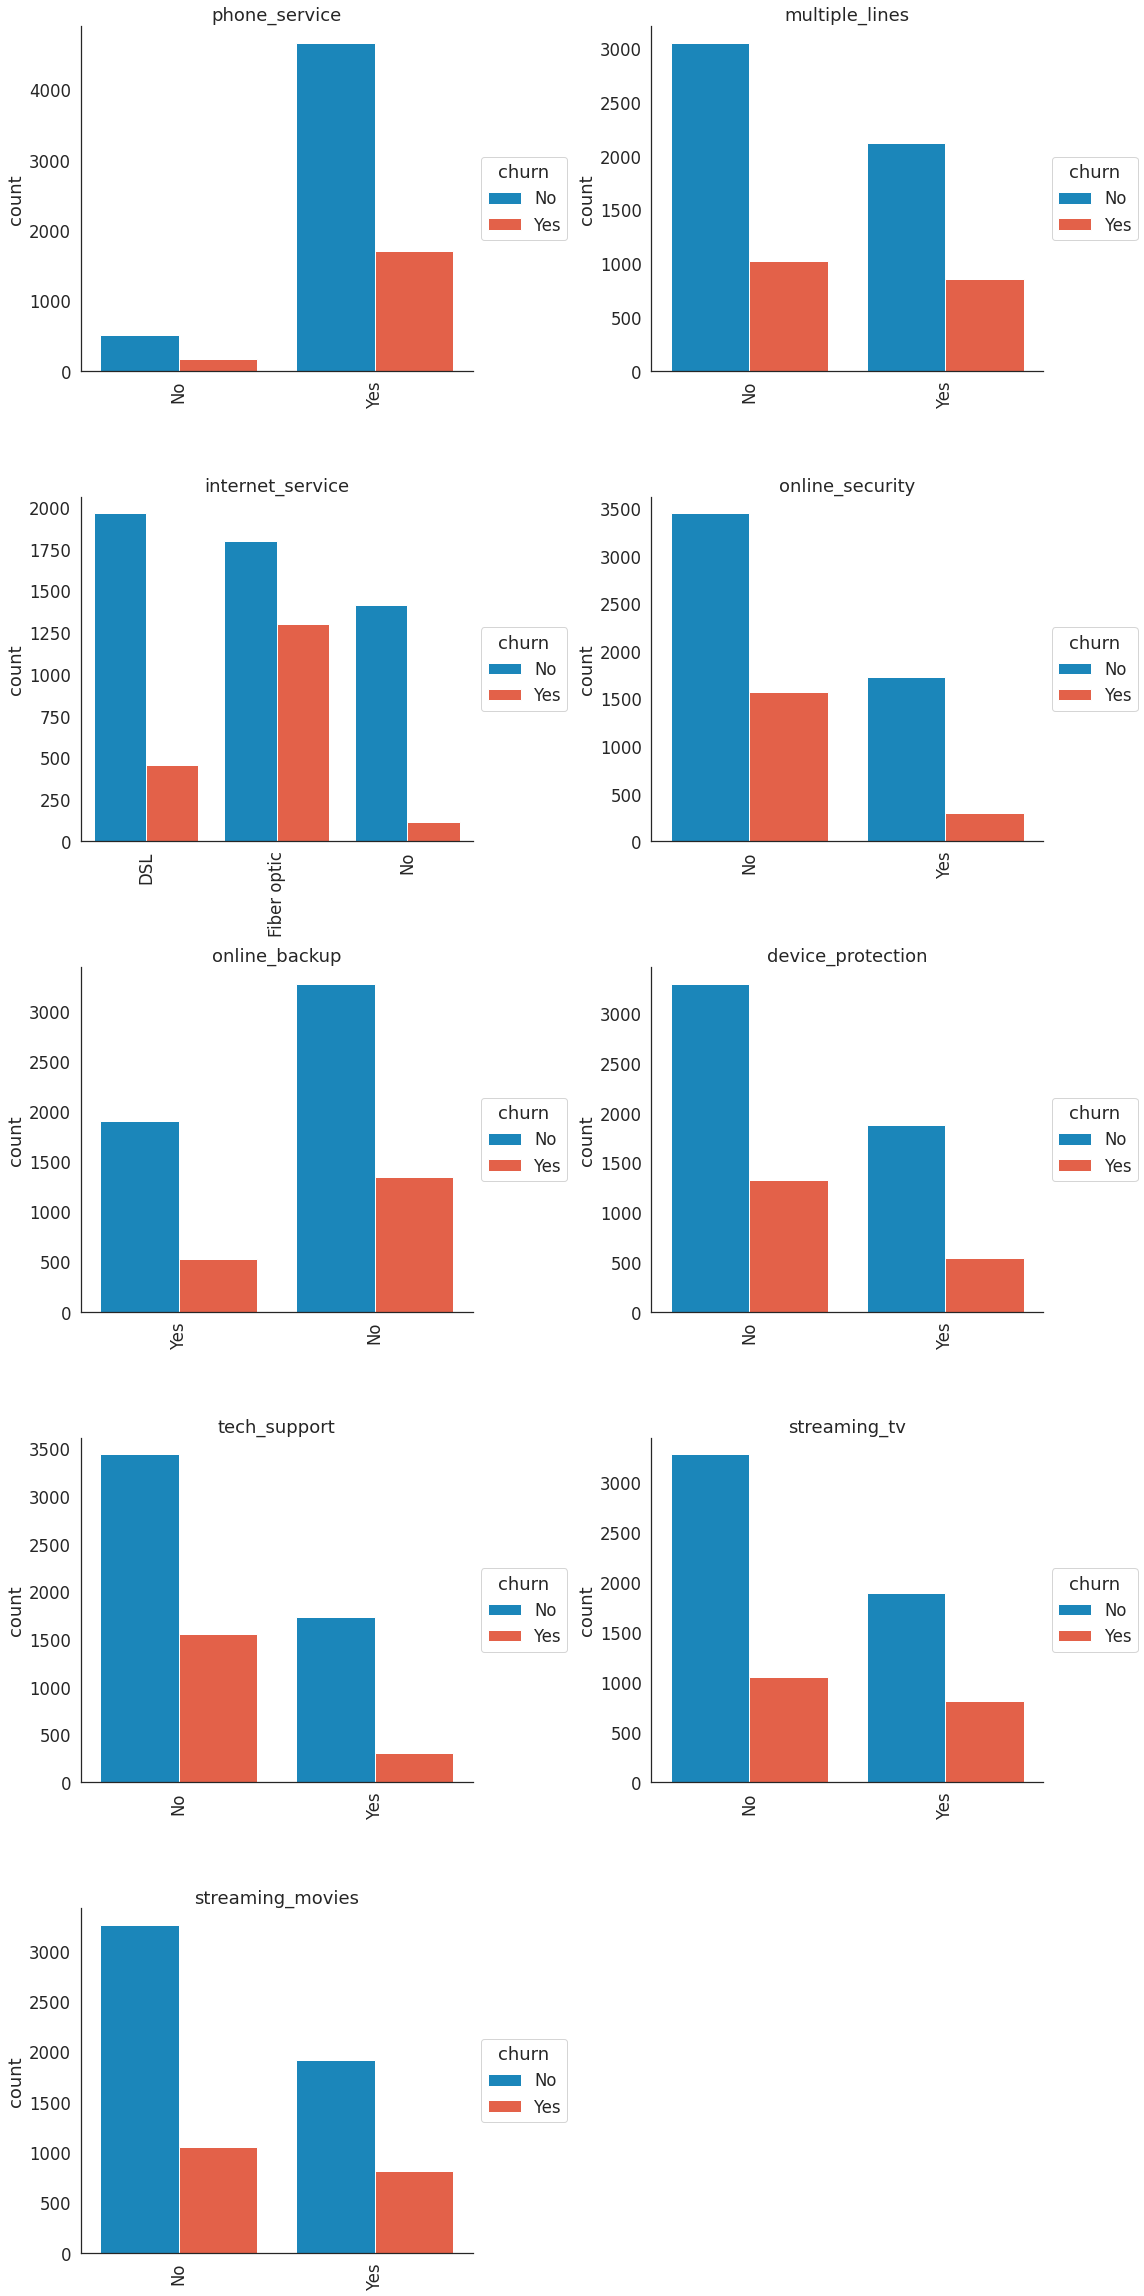

In [ ]:
column_service = ['phone_service', 'multiple_lines', 'internet_service', 
                  'online_security', 'online_backup', 'device_protection', 
                  'tech_support', 'streaming_tv', 'streaming_movies']

fig, ax = plt.subplots(5, 2, figsize=(16,32))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_service):
  count_plot(data, col, axes_list[i], hue='churn')
  plt.setp(axes_list[i].get_xticklabels(), rotation=90)

axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

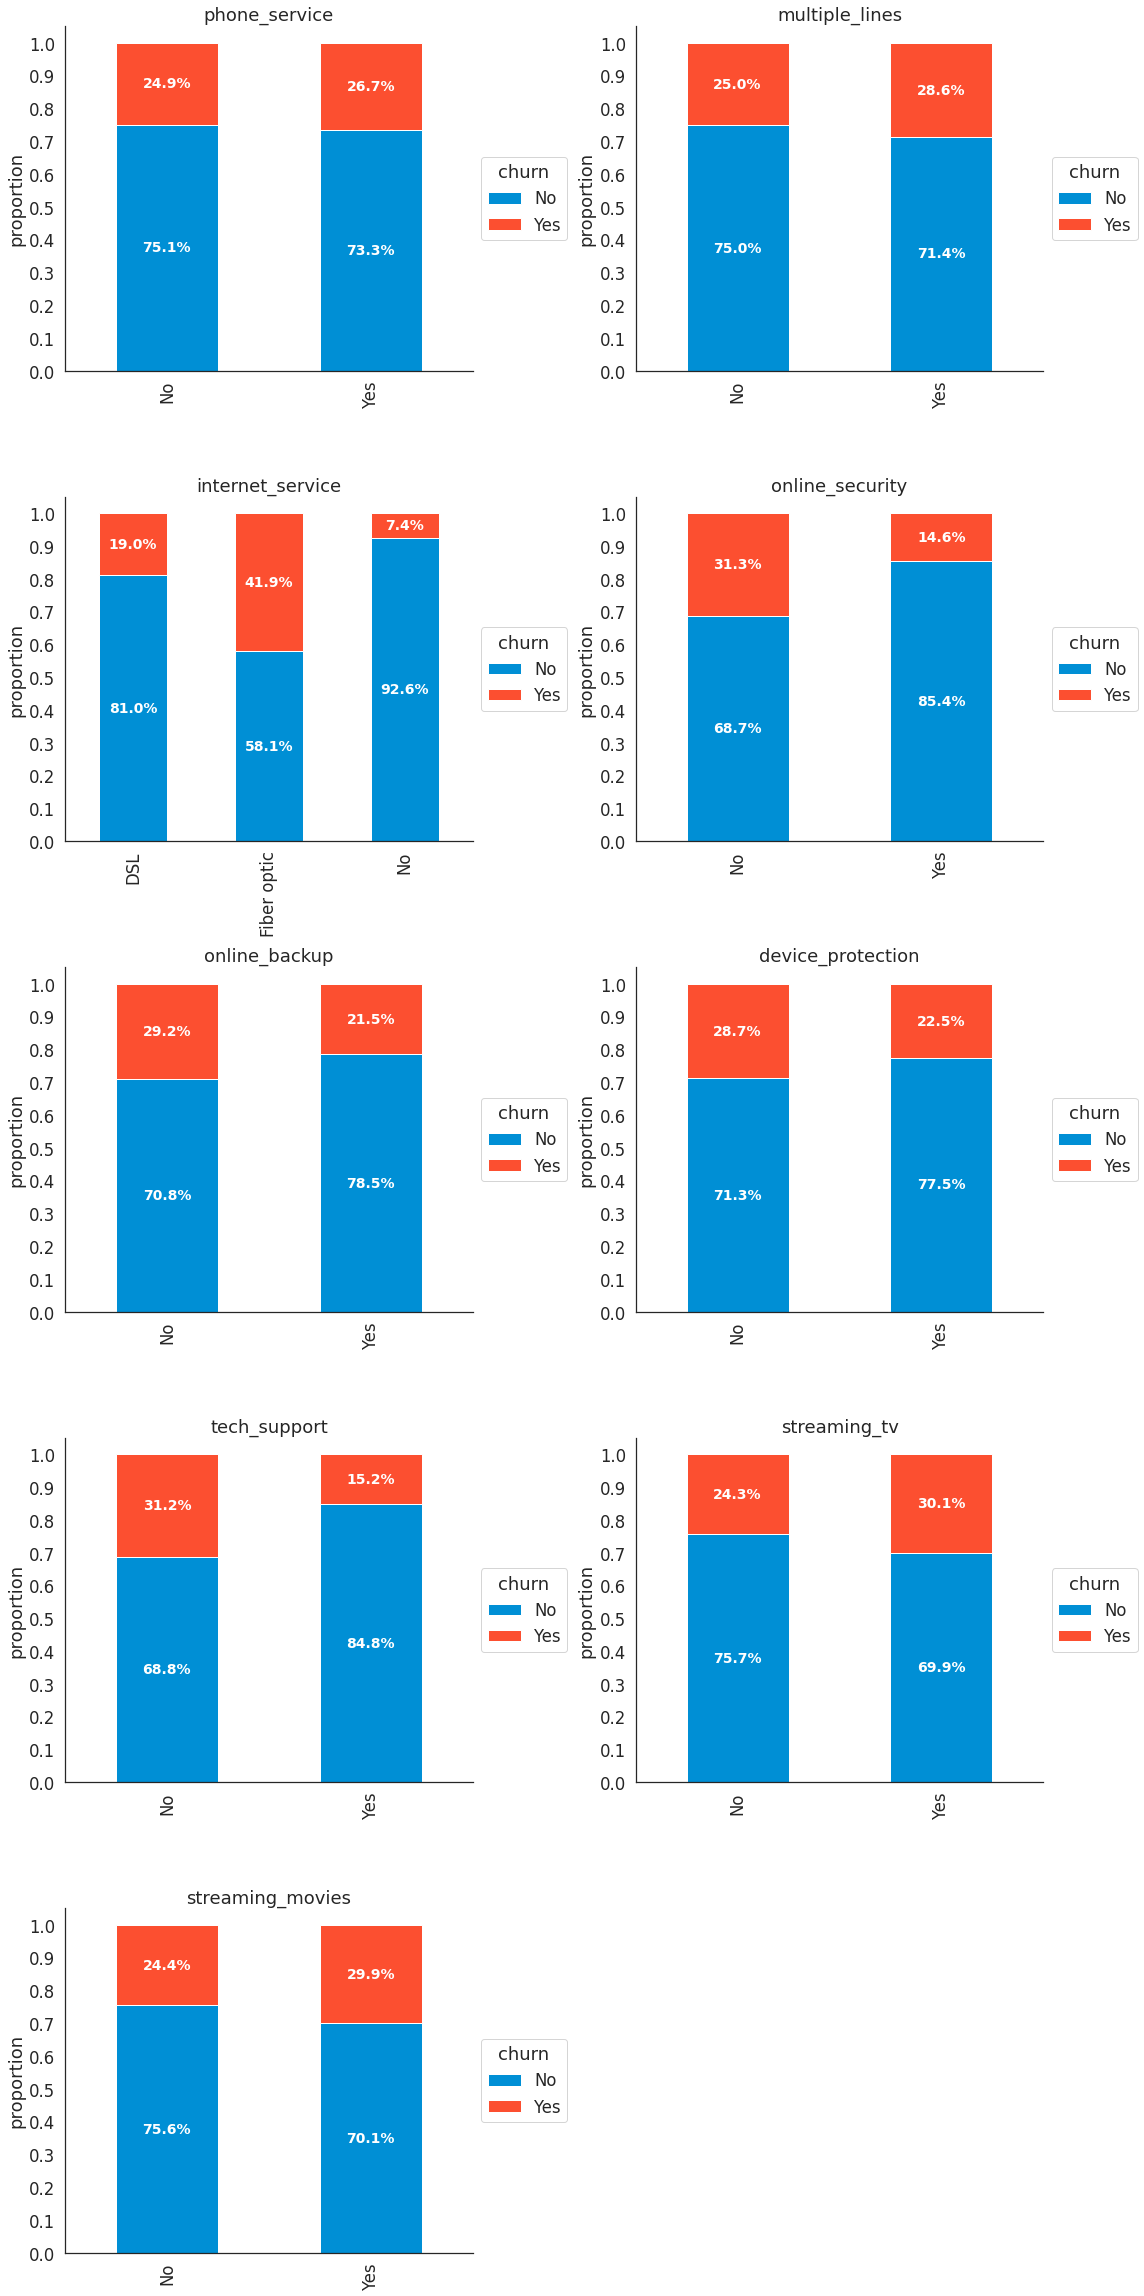

In [ ]:
column_service = ['phone_service', 'multiple_lines', 'internet_service', 
                  'online_security', 'online_backup', 'device_protection', 
                  'tech_support', 'streaming_tv', 'streaming_movies']

fig, ax = plt.subplots(5, 2, figsize=(16,32))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_service):
  stacked_bar_plot(data, col, 'churn', axes_list[i])

axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

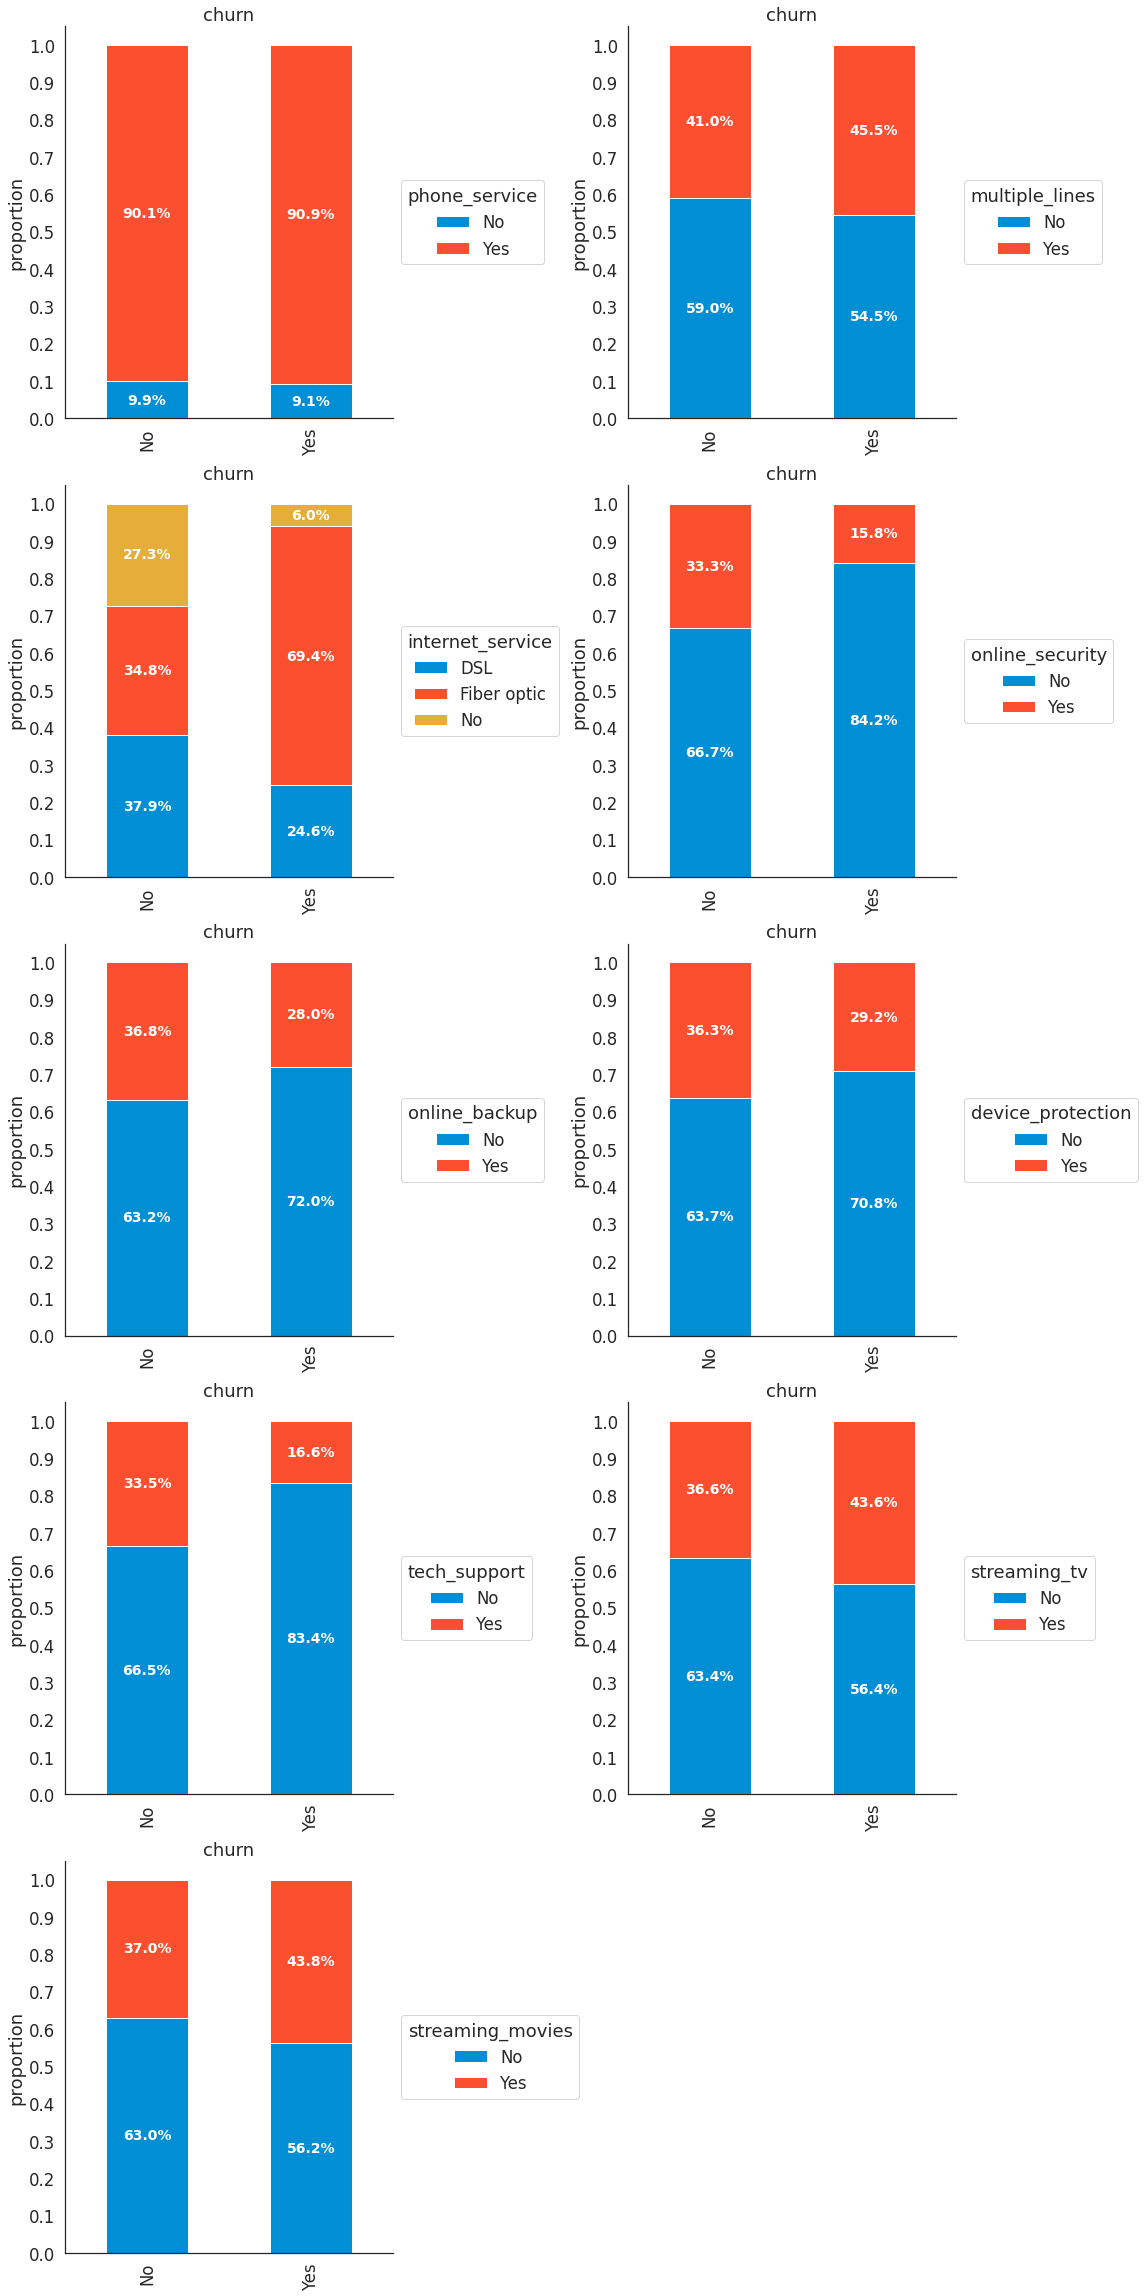

In [ ]:
column_service = ['phone_service', 'multiple_lines', 'internet_service', 
                  'online_security', 'online_backup', 'device_protection', 
                  'tech_support', 'streaming_tv', 'streaming_movies']

fig, ax = plt.subplots(5, 2, figsize=(16,32))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_service):
  stacked_bar_plot(data, 'churn', col, axes_list[i])

axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

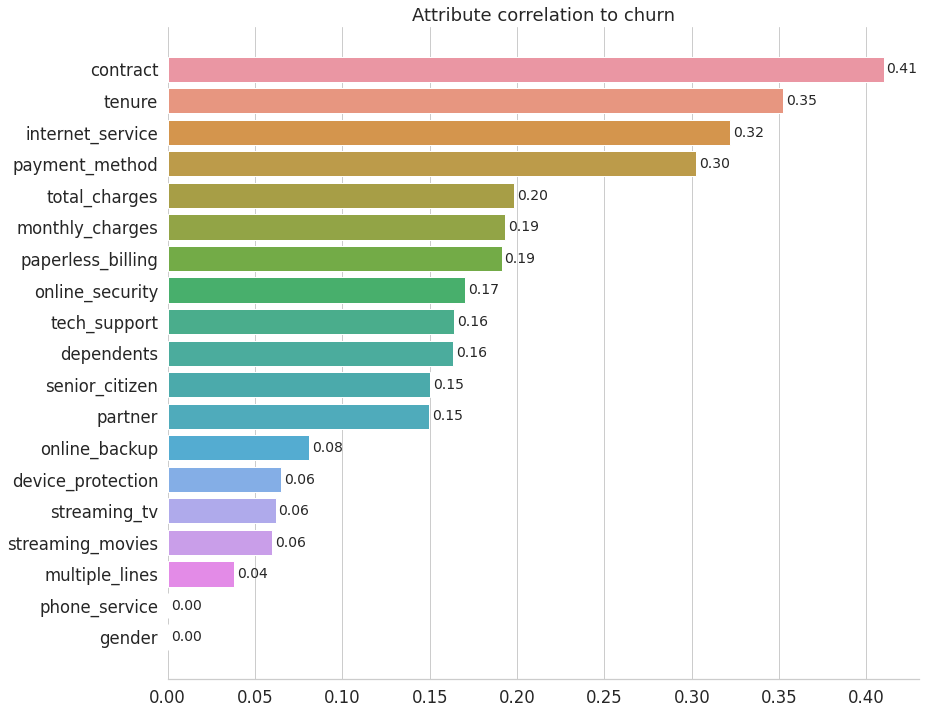

In [ ]:
# calculate the associations (correlation) between features
associations_out = associations(data,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)
# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['churn'].drop('churn').sort_values(ascending=False)

with sns.axes_style('whitegrid'):
  fig, ax = plt.subplots(figsize=(12,12))

  sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax)
  ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

  ax.grid(False, axis='y')
  ax.set_title('Attribute correlation to churn')

  ax.axis('tight')
  sns.despine(left=True)
  plt.show()

# 6. Data Preprocessing

Comparison:
- Without removing redundant
  - with OHE (no drop): 47 columns
  - with OHE (drop binary): 41 columns
  - with OHE (drop first): 31 columns
- With removing redundant:
  - with OHE (no drop): 40 columns
  - with OHE (drop binary): 27 columns
  - with OHE (drop first): 24 columns

## Preprocessing

In [4]:
# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

# only contains input features
column_categorical.remove('churn')

# =========================================
# TRAIN - TEST SPLIT
# =========================================
data_X = data.drop('churn', axis=1)
data_y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3,
                                                    random_state=1, stratify=data_y)

# =========================================
# LABEL ENCODING
# =========================================
le = LabelEncoder()

le.fit(y_train)

y_train_encode = le.transform(y_train)
y_test_encode = le.transform(y_test)

# =========================================
# ONE HOT ENCODING
# =========================================
# ohe = OneHotEncoder(sparse=False, drop='first')
ohe = OneHotEncoder(sparse=False, drop='if_binary')
# ohe = OneHotEncoder(sparse=False)

ohe.fit(X_train[column_categorical])

# for col in column_categorical:
X_train_ohe = ohe.transform(X_train[column_categorical])
X_test_ohe = ohe.transform(X_test[column_categorical])

# =========================================
# OHE COLUMN TO SNAKE CASAE
# =========================================
# rename ohe column to snake_case
column_ohe = ohe.get_feature_names_out()

for i, col in enumerate(column_ohe):
  column_ohe[i] = inflection.underscore(column_ohe[i]).replace(' ', '_').replace('_(automatic)','')

# =========================================
# COMBINE NUMERICAL COLUMN & ENCODED CATEGORICAL
# =========================================
# create dataframe from one-hot encoded features
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=column_ohe, index=X_train.index)

# combine the numerical and encoded features
X_train_encode = pd.concat([X_train.drop(columns=column_categorical), X_train_ohe_df], axis=1)

# create dataframe from one-hot encoded features
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=column_ohe, index=X_test.index)

# combine the numerical and encoded features
X_test_encode = pd.concat([X_test.drop(columns=column_categorical), X_test_ohe_df], axis=1)

# =========================================
# FEATURE SCALING
# =========================================
X_train_scale = X_train_encode.copy()
X_test_scale = X_test_encode.copy()

for i in column_numerical:
  scaler = MinMaxScaler()
  scaler.fit(X_train_scale[[i]])

  X_train_scale[[i]] = scaler.transform(X_train_scale[[i]])
  X_test_scale[[i]] = scaler.transform(X_test_scale[[i]])

## Encoded Dataframe

In [5]:
# combine the X-train and X-test
data_encode = pd.concat([X_train_encode, X_test_encode], axis=0)

# combine with the y-train
data_encode = data_encode.join(pd.Series(y_train_encode, name='churn', index=X_train_encode.index), lsuffix='_1', rsuffix='_2')

# combine with the y-test
data_encode = data_encode.join(pd.Series(y_test_encode, name='churn', index=X_test_encode.index), lsuffix='_1', rsuffix='_2')

# merging the y-train and y-test column
data_encode['churn_1'].fillna(data_encode['churn_2'], inplace=True)
data_encode.drop(columns='churn_2', inplace=True)
data_encode.rename(columns={'churn_1':'churn'}, inplace=True)

data_encode.head()

,tenure,monthly_charges,total_charges,gender_male,senior_citizen_1,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_dsl,...,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_bank_transfer,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check,churn
6427,41,20.15,802.35,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6971,18,99.75,1836.25,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
96,71,66.85,4748.70,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5640,1,79.60,79.60,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
414,48,70.65,3545.05,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


## Scaled Dataframe
This dataframe has been encoded and scaled

In [6]:
# combine the X-train and X-test
data_scale = pd.concat([X_train_scale, X_test_scale], axis=0)

# combine with the y-train
data_scale = data_scale.join(pd.Series(y_train_encode, name='churn', index=X_train_scale.index), lsuffix='_1', rsuffix='_2')

# combine with the y-test
data_scale = data_scale.join(pd.Series(y_test_encode, name='churn', index=X_test_scale.index), lsuffix='_1', rsuffix='_2')

# merging the y-train and y-test column
data_scale['churn_1'].fillna(data_scale['churn_2'], inplace=True)
data_scale.drop(columns='churn_2', inplace=True)
data_scale.rename(columns={'churn_1':'churn'}, inplace=True)

data_scale.head()

,tenure,monthly_charges,total_charges,gender_male,senior_citizen_1,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_dsl,...,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_bank_transfer,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check,churn
6427,0.569444,0.017439,0.092386,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6971,0.250000,0.810663,0.211433,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
96,0.986111,0.482810,0.546783,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5640,0.013889,0.609865,0.009165,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
414,0.666667,0.520678,0.408190,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


## Correlation

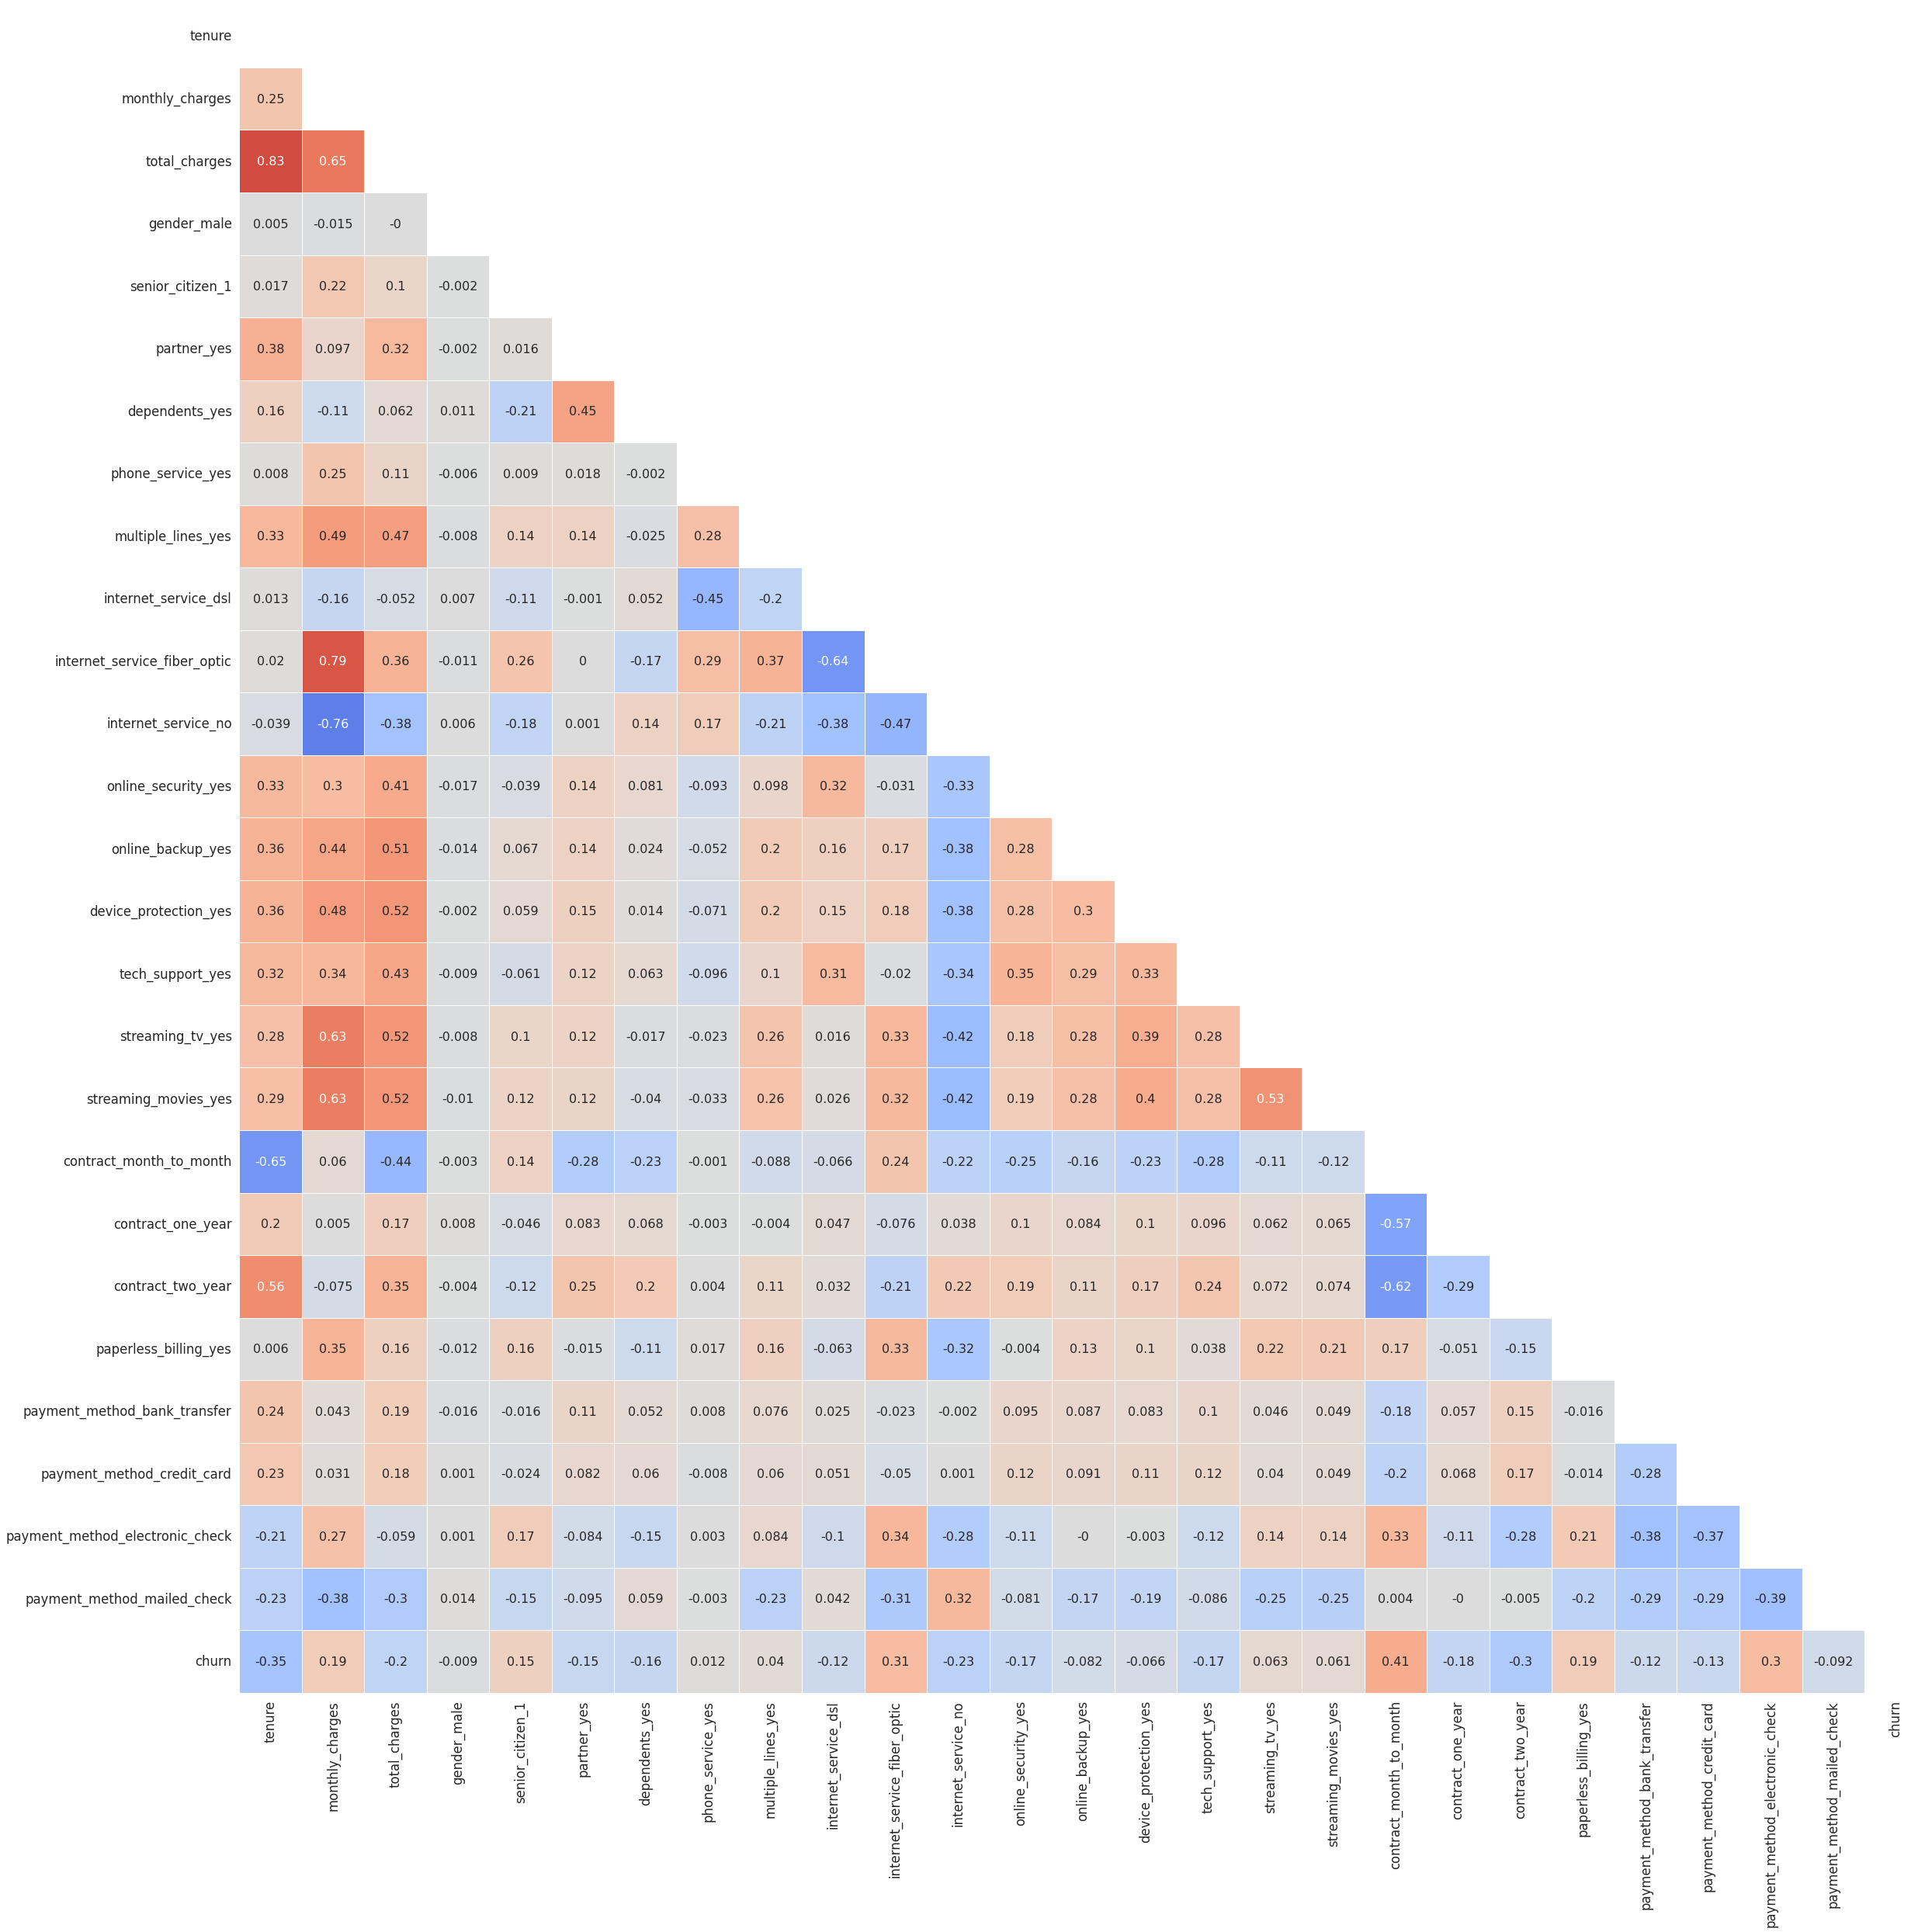

In [ ]:
corr_matrix = data_scale.corr().round(3)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cbar=False,
            cmap='coolwarm', linewidth=1, mask=mask,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)

plt.show()

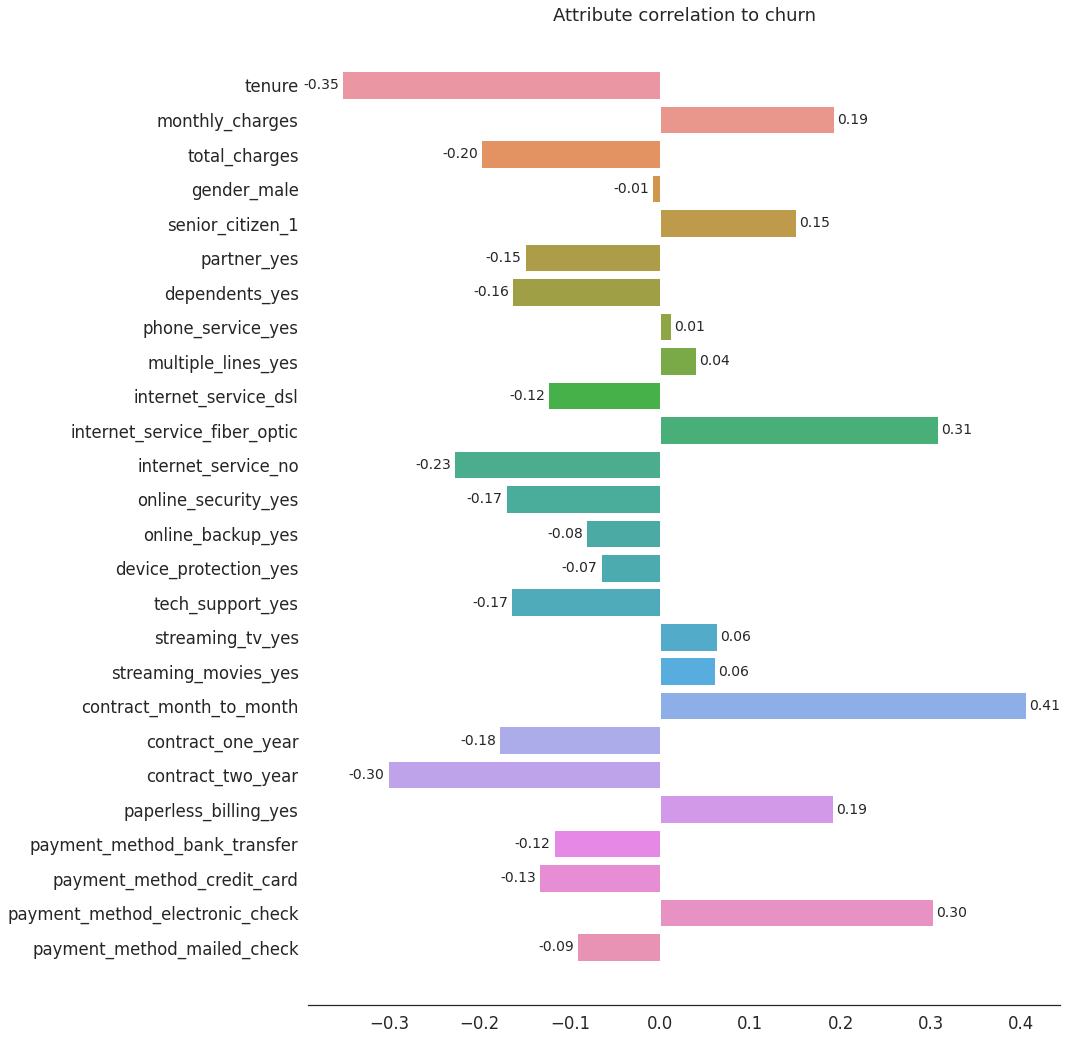

In [ ]:
corr_matrix = data_scale.corr().round(3)
corr_target = corr_matrix['churn'].drop('churn')

fig, ax = plt.subplots(figsize=(12,18))

sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.grid(False, axis='y')
ax.set_title('Attribute correlation to churn')  

ax.axis('tight')
sns.despine(left=True)
plt.show()

In [ ]:
# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data_scale.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

# only contains input features
# column_categorical.remove('churn')

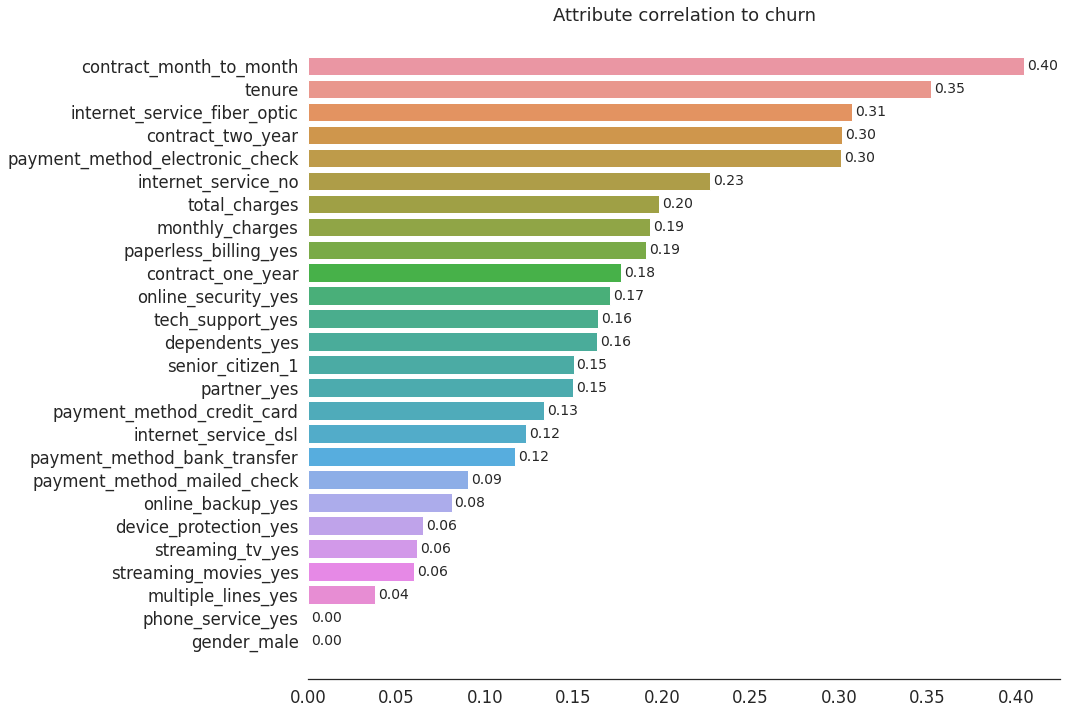

In [ ]:
# calculate the associations (correlation) between features
associations_out = associations(data_scale,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)
# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['churn'].drop('churn').sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.grid(False, axis='y')
ax.set_title('Attribute correlation to churn')

ax.axis('tight')
sns.despine(left=True)
plt.show()

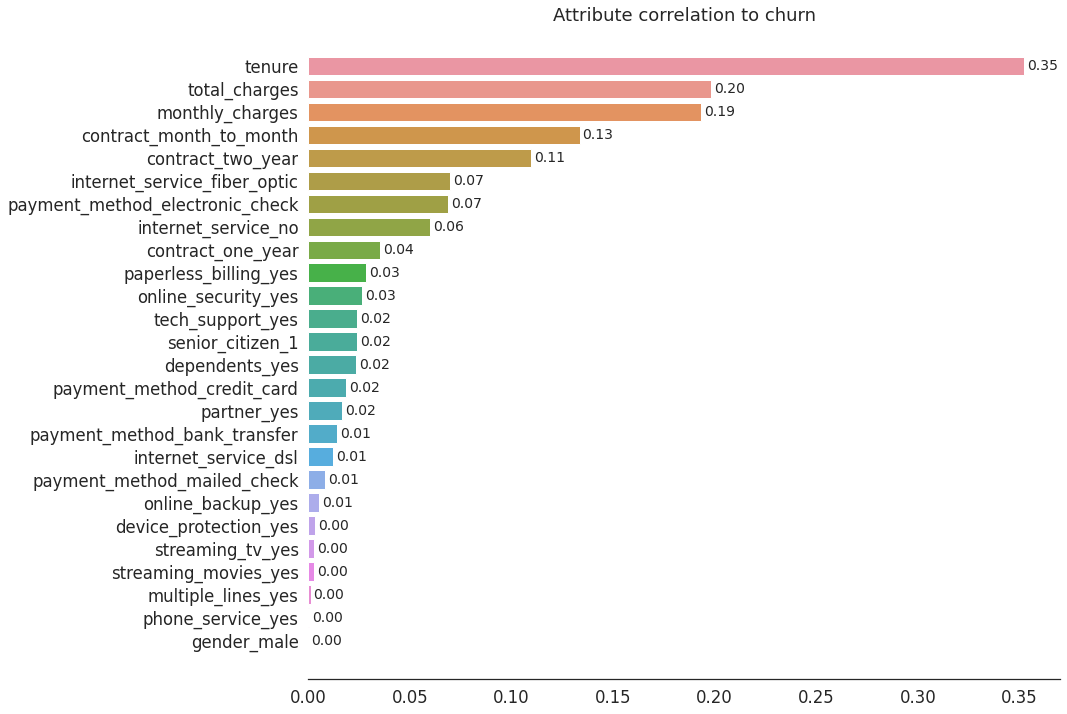

In [ ]:
# calculate the associations (correlation) between features
associations_out = associations(data_scale,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='theil',
                                compute_only=True)
# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['churn'].drop('churn').sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.grid(False, axis='y')
ax.set_title('Attribute correlation to churn')

ax.axis('tight')
sns.despine(left=True)
plt.show()

## SMOTE

In [7]:
# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data_scale.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

# only contains input features
# column_categorical.remove('churn')

In [8]:
smote = SMOTE(random_state=1)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scale, y_train_encode)

X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train_smote.columns)
y_train_smote_df = pd.DataFrame(y_train_smote, columns=['churn'])

data_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

# Modeling

## Function

### Print Single Report

In [9]:
def print_report(y_test, y_pred, average=None, full_report=True):
  if full_report:
    print(classification_report(y_test, y_pred, digits=3))
    print('==============================================================')
    print('==============================================================')

  if average != None:
    print('Accuracy\t: ', round(accuracy_score(y_test, y_pred),3))
    print('Precision\t: ', round(precision_score(y_test, y_pred, average=average),3)) 
    print('Recall\t\t: ', round(recall_score(y_test, y_pred, average=average),3))
    print('F1 Score\t: ', round(f1_score(y_test, y_pred, average=average),3)) 
    print('ROC AUC\t\t: ', round(roc_auc_score(y_test, y_pred, average=average),3)) 
  else:
    print('Accuracy\t: ', round(accuracy_score(y_test, y_pred),3))
    print('Precision\t: ', round(precision_score(y_test, y_pred,),3)) 
    print('Recall\t\t: ', round(recall_score(y_test, y_pred),3))
    print('F1 Score\t: ', round(f1_score(y_test, y_pred),3)) 
    print('ROC AUC\t\t: ', round(roc_auc_score(y_test, y_pred),3)) 

### Highlight Max-Min

In [10]:
def highlight_max_min(df):
  display(df.round(3).style.highlight_max(props='color:white; background-color:#008FD5').highlight_min(props='color:white; background-color:#FC4F30'))

### Print Score

In [11]:
def print_score(y_pred_list, y_test, average=None, orderby='accuracy', sort=False):
  model_name = []
  accuracy = []
  precision = []
  recall = []
  f1 = []
  roc_auc = []

  for name, y_pred in y_pred_list.items():
    model_name.append(name)
    if average != None:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred, average=average))
      recall.append(recall_score(y_test, y_pred, average=average))
      f1.append(f1_score(y_test, y_pred, average=average))
      roc_auc.append(roc_auc_score(y_test, y_pred, average=average))
    else:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred))
      recall.append(recall_score(y_test, y_pred))
      f1.append(f1_score(y_test, y_pred))
      roc_auc.append(roc_auc_score(y_test, y_pred))

  score_list = {
      'model':model_name,
      'accuracy':accuracy,
      'precision':precision,
      'recall':recall,
      'f1_score':f1,
      'roc_auc':roc_auc
  }

  if sort:
    score_df = pd.DataFrame(score_list).set_index('model').sort_values(orderby, ascending=False)
  else:
    score_df = pd.DataFrame(score_list).set_index('model')
    
  highlight_max_min(score_df)

  return score_df

### Harmonic Mean Accuracy - Recall

In [12]:
def hm_acc_recall(y_test_model, y_pred, beta=1, **kwargs):
  accuracy = accuracy_score(y_test_model, y_pred)
  recall = recall_score(y_test_model, y_pred)

  fbeta_score = (1 + beta**2) * (accuracy*recall)/(beta*accuracy+recall)
  return fbeta_score

### Grid Search

In [13]:
def grid_search(model, grid, X, y, name='', scoring='accuracy', refit=True):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  
  grid_search = GridSearchCV(estimator=model, param_grid=grid,
                             n_jobs=-1, cv=cv, scoring=scoring, error_score=0, refit=refit)
  
  grid_result = grid_search.fit(X, y)

  # summarize results
  print(f'{name}\t: {round(grid_result.best_score_,3)} with {grid_result.best_params_}')

  # means = grid_result.cv_results_['mean_test_score']
  # stds = grid_result.cv_results_['std_test_score']
  # params = grid_result.cv_results_['params']
  # for mean, stdev, param in zip(means, stds, params):
  #     print("%f (%f) with: %r" % (mean, stdev, param))

  # return grid_result.best_params_, grid_result.best_estimator_
  return grid_result

### CV and Test

In [14]:
def cv_and_test(model,
                X_train_model, y_train_model,
                X_test_model, y_test_model,
                cv_scoring='accuracy'):
  # CV
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_validate(model, X_train_model, y_train_model, scoring=cv_scoring, cv=cv, n_jobs=-1)

  # print(f'Cross validation {cv_scoring}: {np.mean(scores).round(3)} ({np.std(scores).round(3)})')
  for scoring in cv_scoring:
    tmp = f'test_{scoring}'
    print(f'Cross validation {scoring}\t: {np.mean(scores[tmp]).round(3)} ({np.std(scores[tmp]).round(3)})')

  # train-test
  model.fit(X_train_model, y_train_model)

  y_pred = model.predict(X_test_model)

  print_report(y_test_model, y_pred, average='macro', full_report=True)

## Default Parameter

In [ ]:
model_list = {
    'Logistic Regression':LogisticRegression(max_iter=1000, random_state=1),
    'Ridge Classifier':RidgeClassifier(random_state=1),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(random_state=1),
    'Neural Network':MLPClassifier(max_iter=1000, random_state=1),
    'Decision Tree':DecisionTreeClassifier(random_state=1),
    'Random Forest':RandomForestClassifier(random_state=1),
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=1),
    'CatBoost Classifier':CatBoostClassifier(random_state=1, verbose=False),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1),
    'XGBoost RF':XGBRFClassifier(random_state=1),
    'LightGBM':LGBMClassifier(random_state=1),
}

X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

In [ ]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_smote = print_score(y_pred_list, y_test_model, average='macro')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.747000,0.707000,0.755000,0.714000,0.755000
Ridge Classifier,0.744000,0.707000,0.756000,0.713000,0.756000
KNN,0.696000,0.660000,0.699000,0.661000,0.699000
SVC,0.765000,0.713000,0.747000,0.724000,0.747000
Neural Network,0.752000,0.686000,0.696000,0.690000,0.696000
Decision Tree,0.731000,0.666000,0.682000,0.672000,0.682000
Random Forest,0.771000,0.708000,0.714000,0.711000,0.714000
Gradient Boosting Classifier,0.788000,0.734000,0.763000,0.744000,0.763000
AdaBoost Classifier,0.755000,0.712000,0.756000,0.720000,0.756000


In [ ]:
score_smote.round(3).style.background_gradient()

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.747000,0.707000,0.755000,0.714000,0.755000
Ridge Classifier,0.744000,0.707000,0.756000,0.713000,0.756000
KNN,0.696000,0.660000,0.699000,0.661000,0.699000
SVC,0.765000,0.713000,0.747000,0.724000,0.747000
Neural Network,0.752000,0.686000,0.696000,0.690000,0.696000
Decision Tree,0.731000,0.666000,0.682000,0.672000,0.682000
Random Forest,0.771000,0.708000,0.714000,0.711000,0.714000
Gradient Boosting Classifier,0.788000,0.734000,0.763000,0.744000,0.763000
AdaBoost Classifier,0.755000,0.712000,0.756000,0.720000,0.756000


## Feature Selection

In [ ]:
model_list = {
    # 'Logistic Regression':LogisticRegression(max_iter=1000, random_state=1),
    # 'Ridge Classifier':RidgeClassifier(random_state=1),
    # 'KNN':KNeighborsClassifier(),
    # 'SVC':SVC(random_state=1),
    # 'Neural Network':MLPClassifier(max_iter=1000, random_state=1),
    # 'Decision Tree':DecisionTreeClassifier(random_state=1),
    # 'Random Forest':RandomForestClassifier(random_state=1),
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=1),
    'CatBoost Classifier':CatBoostClassifier(random_state=1, verbose=False),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1),
    # 'XGBoost RF':XGBRFClassifier(random_state=1),
    'LightGBM':LGBMClassifier(random_state=1),
}

X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

In [ ]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_smote = print_score(y_pred_list, y_test_model, average='macro')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.788000,0.734000,0.763000,0.744000,0.763000
AdaBoost Classifier,0.755000,0.712000,0.756000,0.720000,0.756000
CatBoost Classifier,0.786000,0.725000,0.728000,0.727000,0.728000
Hist Gradient Boosting,0.780000,0.719000,0.722000,0.721000,0.722000
XGBoost,0.784000,0.731000,0.762000,0.741000,0.762000
LightGBM,0.785000,0.725000,0.732000,0.728000,0.732000


In [ ]:
score_smote.round(3).style.background_gradient()

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.788000,0.734000,0.763000,0.744000,0.763000
AdaBoost Classifier,0.755000,0.712000,0.756000,0.720000,0.756000
CatBoost Classifier,0.786000,0.725000,0.728000,0.727000,0.728000
Hist Gradient Boosting,0.780000,0.719000,0.722000,0.721000,0.722000
XGBoost,0.784000,0.731000,0.762000,0.741000,0.762000
LightGBM,0.785000,0.725000,0.732000,0.728000,0.732000


### Univariate Filter (ANOVA)

before filter	: (7244, 26)
after filter	: (7244, 13)


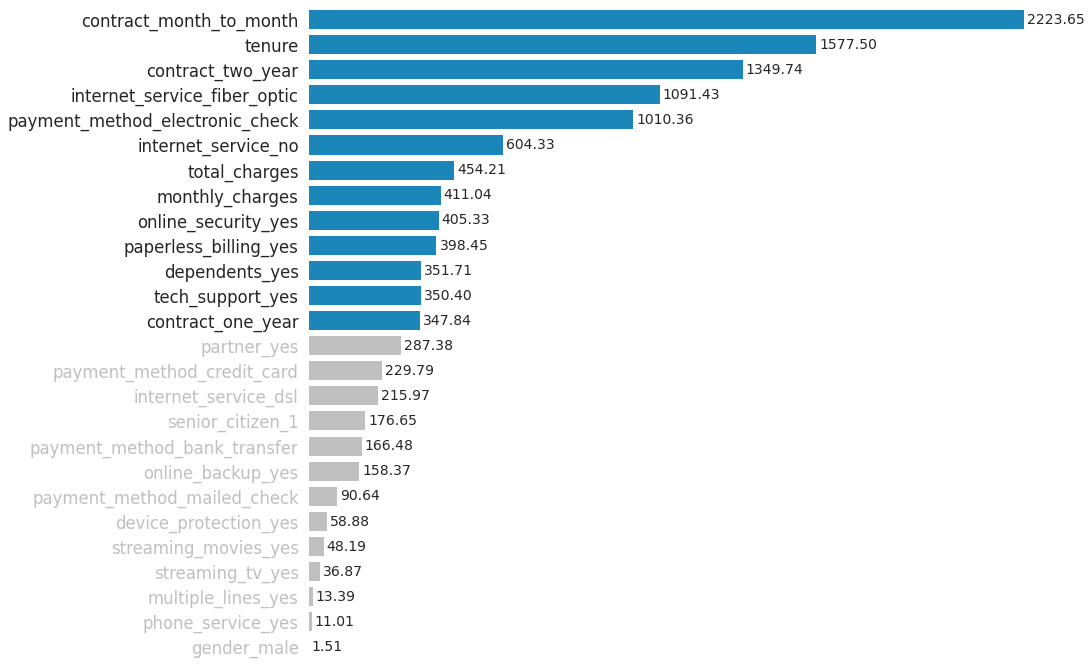

In [ ]:
threshold = 13

filter = SelectKBest(score_func=f_classif, k=threshold)
filter.fit(X_train_model, y_train_model)

X_train_filter = filter.transform(X_train_model)
X_test_filter = filter.transform(X_test_model)

print('before filter\t:', X_train_model.shape)
print('after filter\t:', X_train_filter.shape)

# viz
selected_feature = filter.get_feature_names_out()
feature_name = filter.feature_names_in_
feature_score = filter.scores_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_score':feature_score}).sort_values('feature_score', ascending=False)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
selected = list()
for i in range(0, X_train_model.shape[1]):
  if i < threshold:
    selected.append(True)
  else:
    selected.append(False)

selected_s = pd.Series(selected, name='selected')
feature_selection = pd.concat([feature_selection, selected_s], axis=1)

# plot the score
palette = []
for i in range(0, len(feature_selection)):
  if i < threshold:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(data=feature_selection, x='feature_score', y='feature_name', ax=ax, palette=palette)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.grid(False, axis='y')

for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_filter, y_train_model)
  y_pred_list[name] = model.predict(X_test_filter)

score_smote_filter = print_score(y_pred_list, y_test_model, average='macro')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.772000,0.721000,0.757000,0.732000,0.757000
AdaBoost Classifier,0.755000,0.715000,0.762000,0.723000,0.762000
CatBoost Classifier,0.788000,0.732000,0.753000,0.741000,0.753000
Hist Gradient Boosting,0.773000,0.716000,0.740000,0.725000,0.740000
XGBoost,0.774000,0.726000,0.767000,0.737000,0.767000
LightGBM,0.777000,0.720000,0.741000,0.728000,0.741000


In [ ]:
score_smote_filter.round(3).style.background_gradient()

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.772000,0.721000,0.757000,0.732000,0.757000
AdaBoost Classifier,0.755000,0.715000,0.762000,0.723000,0.762000
CatBoost Classifier,0.788000,0.732000,0.753000,0.741000,0.753000
Hist Gradient Boosting,0.773000,0.716000,0.740000,0.725000,0.740000
XGBoost,0.774000,0.726000,0.767000,0.737000,0.767000
LightGBM,0.777000,0.720000,0.741000,0.728000,0.741000


### Wrapper Method (RFE)

#### Logistic Regression

before wrapper	: (7244, 26)
after wrapper	: (7244, 13)


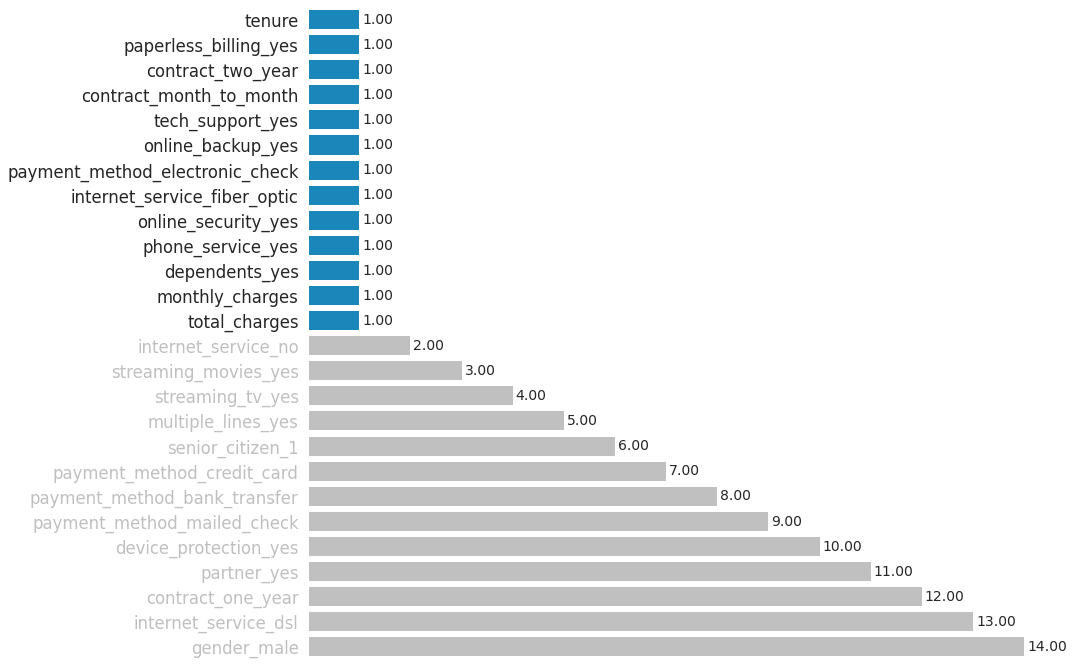

In [ ]:
# estimator parameter:
# A supervised learning estimator with a fit method
# that provides information about feature importance
# (e.g. coef_, feature_importances_) -> DecisionTree uses feature importance

threshold = 13
estimator = LogisticRegression(random_state=1)

wrapper = RFE(estimator=estimator, n_features_to_select=threshold)
wrapper.fit(X_train_model, y_train_model)

X_train_wrap_lr = wrapper.transform(X_train_model)
X_test_wrap_lr = wrapper.transform(X_test_scale)

print('before wrapper\t:', X_train_model.shape)
print('after wrapper\t:', X_train_wrap_lr.shape)

# viz
selected_feature = wrapper.get_feature_names_out()
feature_name = wrapper.feature_names_in_
feature_ranking = wrapper.ranking_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_ranking':feature_ranking}).sort_values('feature_ranking', ascending=True)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
feature_selection['selected'] = feature_selection['feature_ranking'].apply(lambda x: True if x == 1 else False)

# plot the score
palette = []
for i in range(0, len(feature_selection)):
  if i < threshold:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(data=feature_selection, x='feature_ranking', y='feature_name', ax=ax, palette=palette)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.grid(False, axis='y')

for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_wrap_lr, y_train_model)
  y_pred_list[name] = model.predict(X_test_wrap_lr)

score_smote_wrap_lr = print_score(y_pred_list, y_test_model, average='macro')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.778000,0.727000,0.762000,0.738000,0.762000
AdaBoost Classifier,0.755000,0.712000,0.758000,0.721000,0.758000
CatBoost Classifier,0.785000,0.728000,0.747000,0.736000,0.747000
Hist Gradient Boosting,0.777000,0.719000,0.739000,0.727000,0.739000
XGBoost,0.776000,0.726000,0.764000,0.737000,0.764000
LightGBM,0.777000,0.718000,0.735000,0.725000,0.735000


In [ ]:
score_smote_wrap_lr.round(3).style.background_gradient()

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.778000,0.727000,0.762000,0.738000,0.762000
AdaBoost Classifier,0.755000,0.712000,0.758000,0.721000,0.758000
CatBoost Classifier,0.785000,0.728000,0.747000,0.736000,0.747000
Hist Gradient Boosting,0.777000,0.719000,0.739000,0.727000,0.739000
XGBoost,0.776000,0.726000,0.764000,0.737000,0.764000
LightGBM,0.777000,0.718000,0.735000,0.725000,0.735000


#### Decision Tree

before wrapper	: (7244, 26)
after wrapper	: (7244, 13)


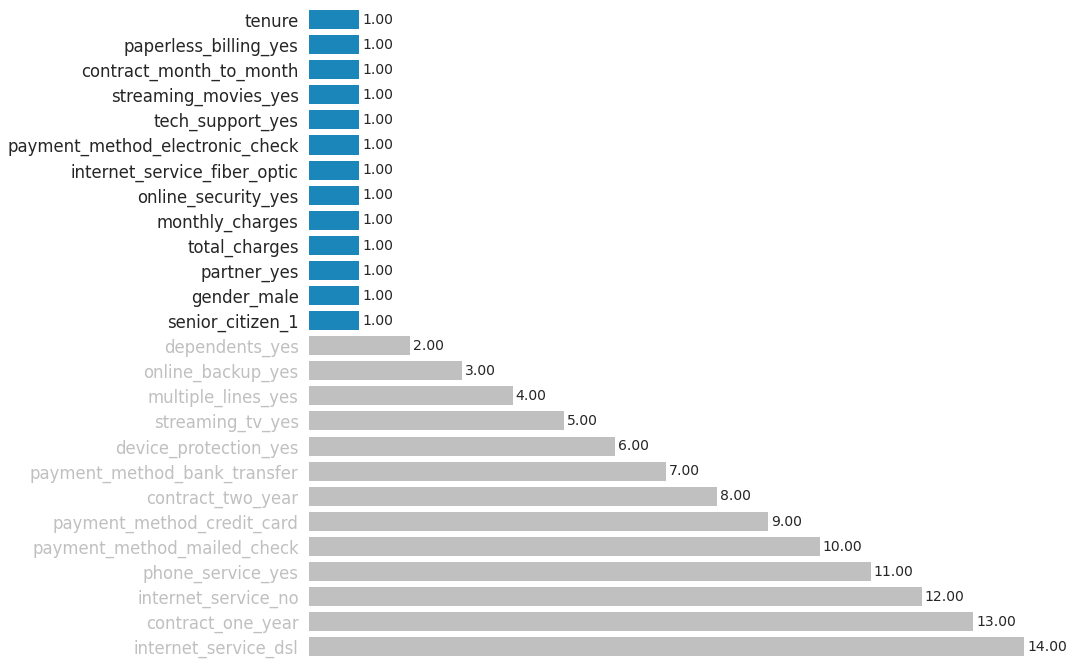

In [ ]:
# estimator parameter:
# A supervised learning estimator with a fit method
# that provides information about feature importance
# (e.g. coef_, feature_importances_) -> DecisionTree uses feature importance

estimator = DecisionTreeClassifier(random_state=1)

wrapper = RFE(estimator=estimator, n_features_to_select=13)
wrapper.fit(X_train_model, y_train_model)

X_train_wrap_dt = wrapper.transform(X_train_model)
X_test_wrap_dt = wrapper.transform(X_test_scale)

print('before wrapper\t:', X_train_model.shape)
print('after wrapper\t:', X_train_wrap_dt.shape)

# viz
selected_feature = wrapper.get_feature_names_out()
feature_name = wrapper.feature_names_in_
feature_ranking = wrapper.ranking_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_ranking':feature_ranking}).sort_values('feature_ranking', ascending=True)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
feature_selection['selected'] = feature_selection['feature_ranking'].apply(lambda x: True if x == 1 else False)

# plot the score
palette = []
for i in range(0, len(feature_selection)):
  if i < threshold:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(data=feature_selection, x='feature_ranking', y='feature_name', ax=ax, palette=palette)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.grid(False, axis='y')

for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_wrap_dt, y_train_model)
  y_pred_list[name] = model.predict(X_test_wrap_dt)

score_smote_wrap_dt = print_score(y_pred_list, y_test_model, average='macro')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.779000,0.726000,0.757000,0.737000,0.757000
AdaBoost Classifier,0.763000,0.715000,0.754000,0.725000,0.754000
CatBoost Classifier,0.786000,0.726000,0.735000,0.730000,0.735000
Hist Gradient Boosting,0.782000,0.723000,0.736000,0.729000,0.736000
XGBoost,0.775000,0.723000,0.757000,0.734000,0.757000
LightGBM,0.782000,0.723000,0.732000,0.727000,0.732000


In [ ]:
score_smote_wrap_dt.round(3).style.background_gradient()

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.779000,0.726000,0.757000,0.737000,0.757000
AdaBoost Classifier,0.763000,0.715000,0.754000,0.725000,0.754000
CatBoost Classifier,0.786000,0.726000,0.735000,0.730000,0.735000
Hist Gradient Boosting,0.782000,0.723000,0.736000,0.729000,0.736000
XGBoost,0.775000,0.723000,0.757000,0.734000,0.757000
LightGBM,0.782000,0.723000,0.732000,0.727000,0.732000


### Embedded Method (Mean)

#### Logistic Regression

before embedded	: (7244, 26)
after embedded	: (7244, 6)


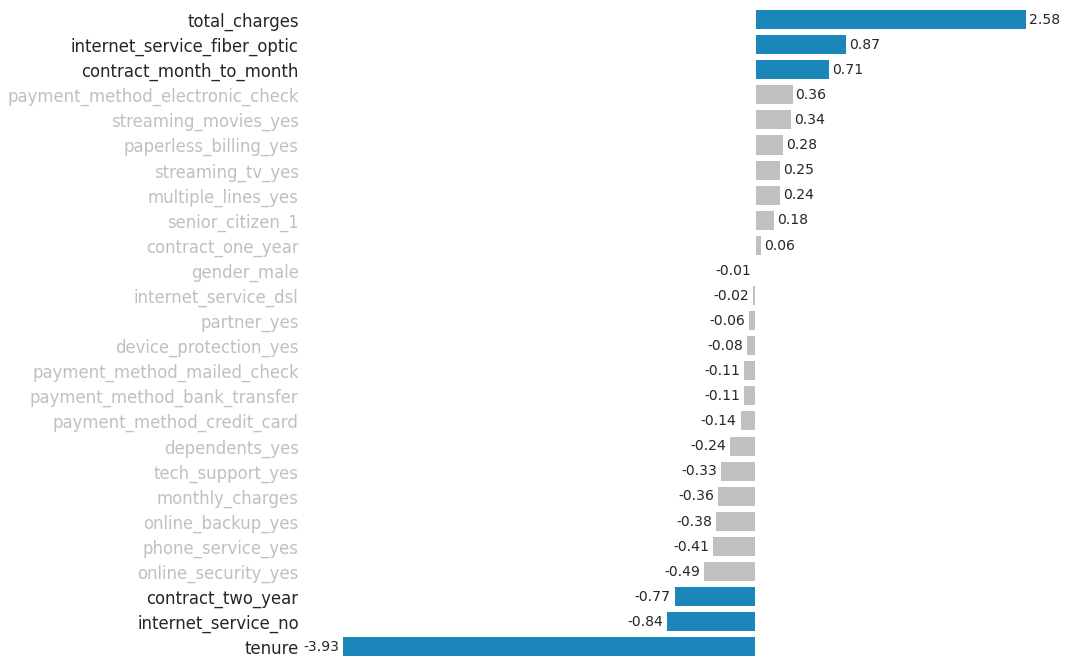

In [ ]:
# estimator parameter:
# A supervised learning estimator with a fit method
# that provides information about feature importance
# (e.g. coef_, feature_importances_) -> DecisionTree uses feature importance

estimator = LogisticRegression(random_state=1)

embedded = SelectFromModel(estimator=estimator)
embedded.fit(X_train_model, y_train_model)

X_train_embed_lr = embedded.transform(X_train_model)
X_test_embed_lr = embedded.transform(X_test_scale)

print('before embedded\t:', X_train_model.shape)
print('after embedded\t:', X_train_embed_lr.shape)

# viz
# selected_feature = embedded.get_feature_names_out()
feature_name = embedded.feature_names_in_
feature_importance = embedded.estimator_.coef_[0]

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_importance':feature_importance}).sort_values('feature_importance', ascending=False)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
threshold = embedded.threshold_
feature_selection['selected'] = feature_selection['feature_importance'].apply(lambda x: True if (abs(x) > threshold) else False)

# viz
palette = []
for i, flag in enumerate(feature_selection['selected']):
  if flag:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,12))

# sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax, palette=palette)
sns.barplot(data=feature_selection, x='feature_importance', y='feature_name', ax=ax, palette=palette)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.grid(False, axis='y')
# ax.set_title('Attribute correlation to customer churn')

for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_embed_lr, y_train_model)
  y_pred_list[name] = model.predict(X_test_embed_lr)

score_smote_embed_lr = print_score(y_pred_list, y_test_model, average='macro')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.741000,0.706000,0.756000,0.711000,0.756000
AdaBoost Classifier,0.730000,0.704000,0.758000,0.704000,0.758000
CatBoost Classifier,0.758000,0.708000,0.745000,0.718000,0.745000
Hist Gradient Boosting,0.735000,0.696000,0.740000,0.701000,0.740000
XGBoost,0.737000,0.707000,0.760000,0.710000,0.760000
LightGBM,0.749000,0.699000,0.736000,0.708000,0.736000


In [ ]:
score_smote_embed_lr.round(3).style.background_gradient()

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.741000,0.706000,0.756000,0.711000,0.756000
AdaBoost Classifier,0.730000,0.704000,0.758000,0.704000,0.758000
CatBoost Classifier,0.758000,0.708000,0.745000,0.718000,0.745000
Hist Gradient Boosting,0.735000,0.696000,0.740000,0.701000,0.740000
XGBoost,0.737000,0.707000,0.760000,0.710000,0.760000
LightGBM,0.749000,0.699000,0.736000,0.708000,0.736000


#### Decision Tree

before embedded	: (7244, 26)
after embedded	: (7244, 5)


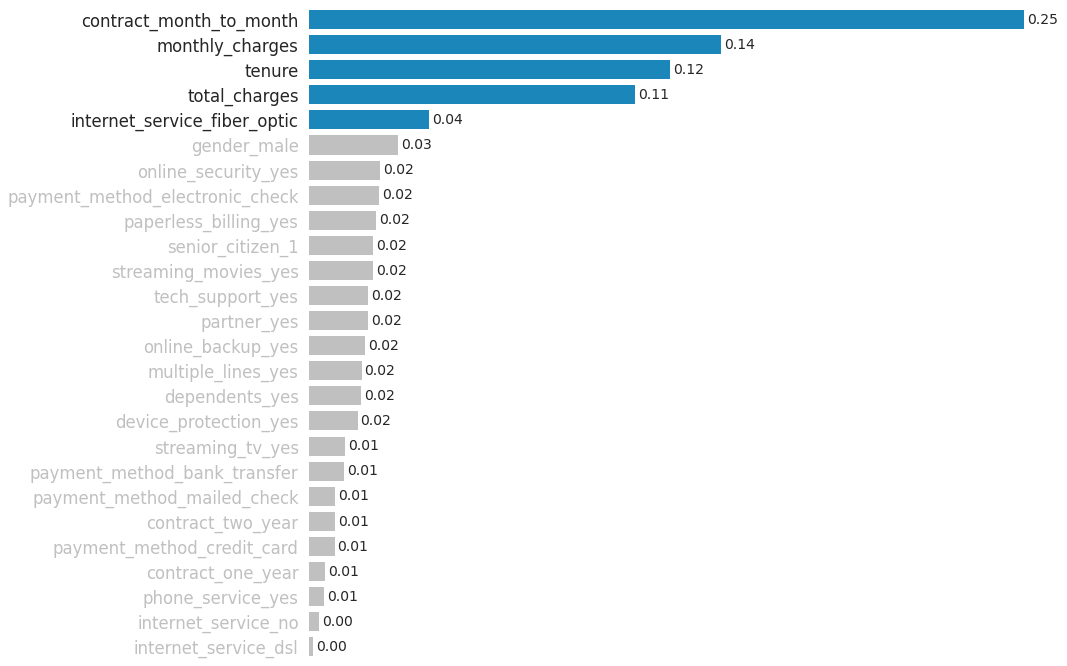

In [ ]:
# estimator parameter:
# A supervised learning estimator with a fit method
# that provides information about feature importance
# (e.g. coef_, feature_importances_) -> DecisionTree uses feature importance

estimator = DecisionTreeClassifier(random_state=1)

embedded = SelectFromModel(estimator=estimator)
embedded.fit(X_train_model, y_train_model)

X_train_embed_dt = embedded.transform(X_train_model)
X_test_embed_dt = embedded.transform(X_test_scale)

print('before embedded\t:', X_train_model.shape)
print('after embedded\t:', X_train_embed_dt.shape)

# viz
# selected_feature = embedded.get_feature_names_out()
feature_name = embedded.feature_names_in_
feature_importance = embedded.estimator_.feature_importances_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_importance':feature_importance}).sort_values('feature_importance', ascending=False)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
threshold = embedded.threshold_
feature_selection['selected'] = feature_selection['feature_importance'].apply(lambda x: True if (abs(x) > threshold) else False)

# viz
palette = []
for i, flag in enumerate(feature_selection['selected']):
  if flag:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,12))

# sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax, palette=palette)
sns.barplot(data=feature_selection, x='feature_importance', y='feature_name', ax=ax, palette=palette)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.grid(False, axis='y')
# ax.set_title('Attribute correlation to customer churn')

for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_embed_dt, y_train_model)
  y_pred_list[name] = model.predict(X_test_embed_dt)

score_smote_embed_dt = print_score(y_pred_list, y_test_model, average='macro')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.745000,0.711000,0.763000,0.716000,0.763000
AdaBoost Classifier,0.737000,0.706000,0.759000,0.709000,0.759000
CatBoost Classifier,0.761000,0.711000,0.748000,0.721000,0.748000
Hist Gradient Boosting,0.754000,0.708000,0.749000,0.717000,0.749000
XGBoost,0.741000,0.709000,0.761000,0.713000,0.761000
LightGBM,0.761000,0.709000,0.744000,0.719000,0.744000


In [ ]:
score_smote_embed_dt.round(3).style.background_gradient()

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.745000,0.711000,0.763000,0.716000,0.763000
AdaBoost Classifier,0.737000,0.706000,0.759000,0.709000,0.759000
CatBoost Classifier,0.761000,0.711000,0.748000,0.721000,0.748000
Hist Gradient Boosting,0.754000,0.708000,0.749000,0.717000,0.749000
XGBoost,0.741000,0.709000,0.761000,0.713000,0.761000
LightGBM,0.761000,0.709000,0.744000,0.719000,0.744000


### Embedded Method (Median)

#### Logistic Regression

before embedded	: (7244, 26)
after embedded	: (7244, 13)


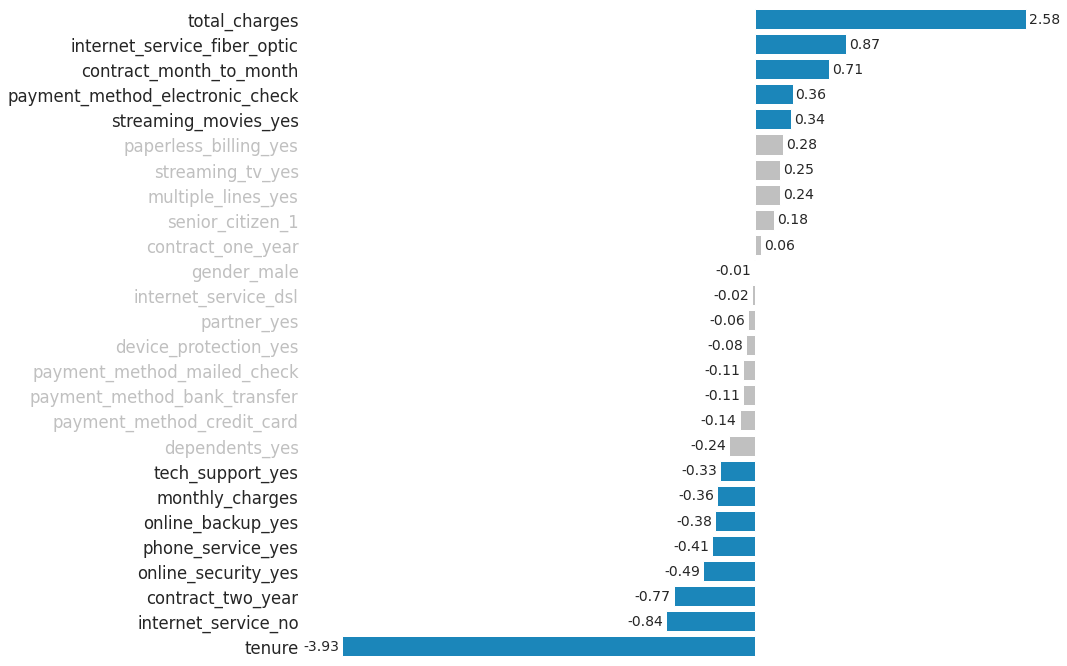

In [ ]:
# estimator parameter:
# A supervised learning estimator with a fit method
# that provides information about feature importance
# (e.g. coef_, feature_importances_) -> DecisionTree uses feature importance

estimator = LogisticRegression(random_state=1)

embedded = SelectFromModel(estimator=estimator, threshold='median')
embedded.fit(X_train_model, y_train_model)

X_train_embed_lr = embedded.transform(X_train_model)
X_test_embed_lr = embedded.transform(X_test_scale)

print('before embedded\t:', X_train_model.shape)
print('after embedded\t:', X_train_embed_lr.shape)

# viz
# selected_feature = embedded.get_feature_names_out()
feature_name = embedded.feature_names_in_
feature_importance = embedded.estimator_.coef_[0]

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_importance':feature_importance}).sort_values('feature_importance', ascending=False)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
threshold = embedded.threshold_
feature_selection['selected'] = feature_selection['feature_importance'].apply(lambda x: True if (abs(x) > threshold) else False)

# viz
palette = []
for i, flag in enumerate(feature_selection['selected']):
  if flag:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,12))

# sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax, palette=palette)
sns.barplot(data=feature_selection, x='feature_importance', y='feature_name', ax=ax, palette=palette)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.grid(False, axis='y')
# ax.set_title('Attribute correlation to customer churn')

for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_embed_lr, y_train_model)
  y_pred_list[name] = model.predict(X_test_embed_lr)

score_smote_embed_lr = print_score(y_pred_list, y_test_model, average='macro')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.767000,0.717000,0.753000,0.727000,0.753000
AdaBoost Classifier,0.744000,0.703000,0.748000,0.710000,0.748000
CatBoost Classifier,0.774000,0.717000,0.742000,0.726000,0.742000
Hist Gradient Boosting,0.766000,0.709000,0.735000,0.719000,0.735000
XGBoost,0.769000,0.720000,0.758000,0.730000,0.758000
LightGBM,0.775000,0.718000,0.741000,0.727000,0.741000


In [ ]:
score_smote_embed_lr.round(3).style.background_gradient()

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.767000,0.717000,0.753000,0.727000,0.753000
AdaBoost Classifier,0.744000,0.703000,0.748000,0.710000,0.748000
CatBoost Classifier,0.774000,0.717000,0.742000,0.726000,0.742000
Hist Gradient Boosting,0.766000,0.709000,0.735000,0.719000,0.735000
XGBoost,0.769000,0.720000,0.758000,0.730000,0.758000
LightGBM,0.775000,0.718000,0.741000,0.727000,0.741000


#### Decision Tree

before embedded	: (7244, 26)
after embedded	: (7244, 13)


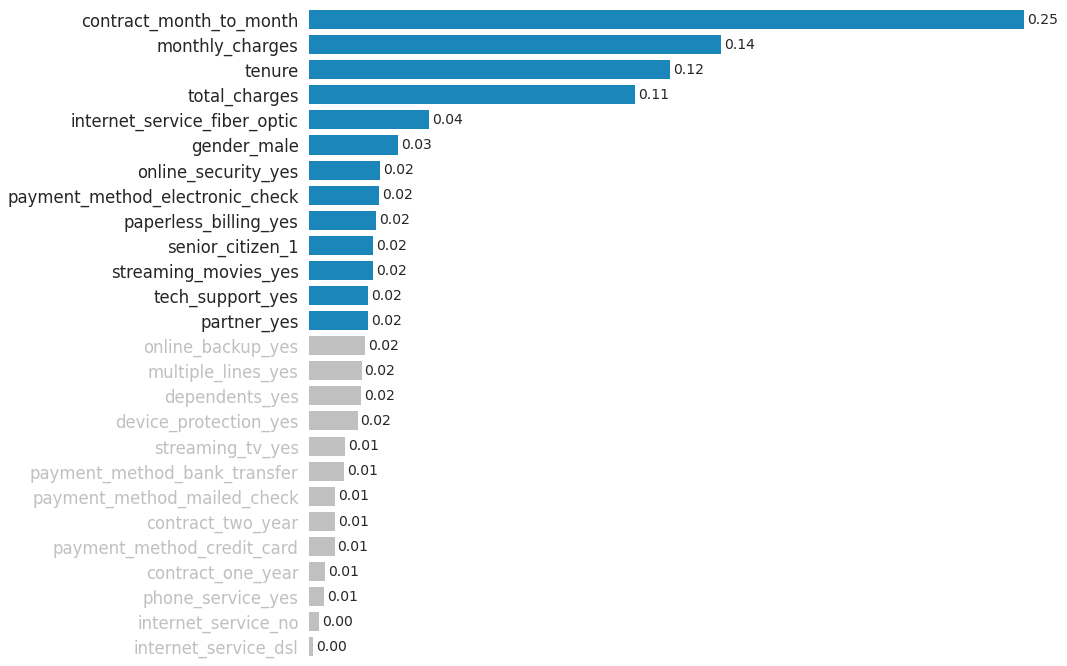

In [ ]:
# estimator parameter:
# A supervised learning estimator with a fit method
# that provides information about feature importance
# (e.g. coef_, feature_importances_) -> DecisionTree uses feature importance

estimator = DecisionTreeClassifier(random_state=1)

embedded = SelectFromModel(estimator=estimator, threshold='median')
embedded.fit(X_train_model, y_train_model)

X_train_embed_lr = embedded.transform(X_train_model)
X_test_embed_lr = embedded.transform(X_test_scale)

print('before embedded\t:', X_train_model.shape)
print('after embedded\t:', X_train_embed_lr.shape)

# viz
# selected_feature = embedded.get_feature_names_out()
feature_name = embedded.feature_names_in_
feature_importance = embedded.estimator_.feature_importances_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_importance':feature_importance}).sort_values('feature_importance', ascending=False)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
threshold = embedded.threshold_
feature_selection['selected'] = feature_selection['feature_importance'].apply(lambda x: True if (abs(x) > threshold) else False)

# viz
palette = []
for i, flag in enumerate(feature_selection['selected']):
  if flag:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,12))

# sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax, palette=palette)
sns.barplot(data=feature_selection, x='feature_importance', y='feature_name', ax=ax, palette=palette)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.grid(False, axis='y')
# ax.set_title('Attribute correlation to customer churn')

for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_embed_dt, y_train_model)
  y_pred_list[name] = model.predict(X_test_embed_dt)

score_smote_embed_dt = print_score(y_pred_list, y_test_model, average='macro')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.745000,0.711000,0.763000,0.716000,0.763000
AdaBoost Classifier,0.737000,0.706000,0.759000,0.709000,0.759000
CatBoost Classifier,0.761000,0.711000,0.748000,0.721000,0.748000
Hist Gradient Boosting,0.754000,0.708000,0.749000,0.717000,0.749000
XGBoost,0.741000,0.709000,0.761000,0.713000,0.761000
LightGBM,0.761000,0.709000,0.744000,0.719000,0.744000


In [ ]:
score_smote_embed_dt.round(3).style.background_gradient()

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.745000,0.711000,0.763000,0.716000,0.763000
AdaBoost Classifier,0.737000,0.706000,0.759000,0.709000,0.759000
CatBoost Classifier,0.761000,0.711000,0.748000,0.721000,0.748000
Hist Gradient Boosting,0.754000,0.708000,0.749000,0.717000,0.749000
XGBoost,0.741000,0.709000,0.761000,0.713000,0.761000
LightGBM,0.761000,0.709000,0.744000,0.719000,0.744000


### Manual (correlation from EDA)

In [ ]:
# X_test_manual = X_test_scale.loc[:, ['contract_month_to_month','contract_one_year','contract_two_year',
#                                        'tenure',
#                                        'online_security_yes',
#                                        'tech_support_yes',
#                                        'internet_service_dsl','internet_service_fiber_optic','internet_service_no',
#                                        'payment_method_bank_transfer','payment_method_credit_card',
#                                        'payment_method_electronic_check','payment_method_mailed_check',
#                                        'online_backup_yes',
#                                        'device_protection_yes']].copy()

In [ ]:
X_train_manual = X_train_model.loc[:, ['contract_month_to_month','contract_one_year','contract_two_year',
                                       'tenure',
                                       'internet_service_dsl','internet_service_fiber_optic','internet_service_no',
                                       'payment_method_bank_transfer','payment_method_credit_card',
                                       'payment_method_electronic_check','payment_method_mailed_check',
                                       'total_charges',
                                       'monthly_charges',
                                       'paperless_billing_yes',
                                       'online_security_yes',
                                       'tech_support_yes',
                                       'dependents_yes']].copy()

X_test_manual = X_test_scale.loc[:, ['contract_month_to_month','contract_one_year','contract_two_year',
                                       'tenure',
                                       'internet_service_dsl','internet_service_fiber_optic','internet_service_no',
                                       'payment_method_bank_transfer','payment_method_credit_card',
                                       'payment_method_electronic_check','payment_method_mailed_check',
                                       'total_charges',
                                       'monthly_charges',
                                       'paperless_billing_yes',
                                       'online_security_yes',
                                       'tech_support_yes',
                                       'dependents_yes']].copy()
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_manual, y_train_model)
  y_pred_list[name] = model.predict(X_test_manual)

score_smote_manual = print_score(y_pred_list, y_test_model, average='macro')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.772000,0.722000,0.759000,0.733000,0.759000
AdaBoost Classifier,0.771000,0.726000,0.771000,0.737000,0.771000
CatBoost Classifier,0.782000,0.725000,0.744000,0.733000,0.744000
Hist Gradient Boosting,0.774000,0.717000,0.741000,0.726000,0.741000
XGBoost,0.776000,0.727000,0.766000,0.738000,0.766000
LightGBM,0.778000,0.719000,0.736000,0.726000,0.736000


In [ ]:
score_smote_manual.round(3).style.background_gradient()

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.772000,0.722000,0.759000,0.733000,0.759000
AdaBoost Classifier,0.771000,0.726000,0.771000,0.737000,0.771000
CatBoost Classifier,0.782000,0.725000,0.744000,0.733000,0.744000
Hist Gradient Boosting,0.774000,0.717000,0.741000,0.726000,0.741000
XGBoost,0.776000,0.727000,0.766000,0.738000,0.766000
LightGBM,0.778000,0.719000,0.736000,0.726000,0.736000


### Compare

In [ ]:
scoring_list = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']

score_compare = dict()

for score in scoring_list:
  col_smote = score_smote.loc[:, score]
  col_smote_filter = score_smote_filter.loc[:, score]
  col_smote_wrap_lr = score_smote_wrap_lr.loc[:, score]
  col_smote_wrap_dt = score_smote_wrap_dt.loc[:, score]
  col_smote_embed_lr = score_smote_embed_lr.loc[:, score]
  col_smote_embed_dt = score_smote_embed_dt.loc[:, score]
  col_smote_manual = score_smote_manual.loc[:, score]

  score_dict = {
    col_smote.name + '_smote' : col_smote.values,
    col_smote_filter.name + '_smote_filter' : col_smote_filter.values,
    col_smote_wrap_lr.name + '_smote_wrap_lr' : col_smote_wrap_lr.values,
    col_smote_wrap_dt.name + '_smote_wrap_dt' : col_smote_wrap_dt.values,
    col_smote_embed_lr.name + '_smote_embed_lr' : col_smote_embed_lr.values,
    col_smote_embed_dt.name + '_smote_embed_dt' : col_smote_embed_dt.values,
    col_smote_manual.name + '_smote_manual' : col_smote_manual.values,
  }

  # score_df = pd.DataFrame(score_dict, index=col_smote_filter.index).sort_values(score+'_smote_filter', ascending=False)
  score_df = pd.DataFrame(score_dict, index=col_smote_filter.index)
  # display(score_df.style.highlight_max(props='color:white; background-color:#008FD5').highlight_min(props='color:white; background-color:#FC4F30'))

  score_compare[score] = score_df

#### Accuracy

In [ ]:
highlight_max_min(score_compare['accuracy'])

,accuracy_smote,accuracy_smote_filter,accuracy_smote_wrap_lr,accuracy_smote_wrap_dt,accuracy_smote_embed_lr,accuracy_smote_embed_dt,accuracy_smote_manual
model,,,,,,,
Gradient Boosting Classifier,0.788000,0.772000,0.778000,0.779000,0.767000,0.745000,0.772000
AdaBoost Classifier,0.755000,0.755000,0.755000,0.763000,0.744000,0.737000,0.771000
CatBoost Classifier,0.786000,0.788000,0.785000,0.786000,0.774000,0.761000,0.782000
Hist Gradient Boosting,0.780000,0.773000,0.777000,0.782000,0.766000,0.754000,0.774000
XGBoost,0.784000,0.774000,0.776000,0.775000,0.769000,0.741000,0.776000
LightGBM,0.785000,0.777000,0.777000,0.782000,0.775000,0.761000,0.778000


In [ ]:
df_acc = pd.DataFrame(score_compare['accuracy'].mean(), columns=['accuracy'])
df_acc.style.background_gradient()

,accuracy
accuracy_smote,0.779460
accuracy_smote_filter,0.773308
accuracy_smote_wrap_lr,0.774649
accuracy_smote_wrap_dt,0.777883
accuracy_smote_embed_lr,0.765894
accuracy_smote_embed_dt,0.749803
accuracy_smote_manual,0.775438


#### Precision

In [ ]:
highlight_max_min(score_compare['precision'])

,precision_smote,precision_smote_filter,precision_smote_wrap_lr,precision_smote_wrap_dt,precision_smote_embed_lr,precision_smote_embed_dt,precision_smote_manual
model,,,,,,,
Gradient Boosting Classifier,0.734000,0.721000,0.727000,0.726000,0.717000,0.711000,0.722000
AdaBoost Classifier,0.712000,0.715000,0.712000,0.715000,0.703000,0.706000,0.726000
CatBoost Classifier,0.725000,0.732000,0.728000,0.726000,0.717000,0.711000,0.725000
Hist Gradient Boosting,0.719000,0.716000,0.719000,0.723000,0.709000,0.708000,0.717000
XGBoost,0.731000,0.726000,0.726000,0.723000,0.720000,0.709000,0.727000
LightGBM,0.725000,0.720000,0.718000,0.723000,0.718000,0.709000,0.719000


In [ ]:
df_prec = pd.DataFrame(score_compare['precision'].mean(), columns=['precision'])
df_prec.style.background_gradient()

,precision
precision_smote,0.724261
precision_smote_filter,0.721641
precision_smote_wrap_lr,0.721693
precision_smote_wrap_dt,0.722525
precision_smote_embed_lr,0.714000
precision_smote_embed_dt,0.709167
precision_smote_manual,0.722620


#### Recall

In [ ]:
highlight_max_min(score_compare['recall'])

,recall_smote,recall_smote_filter,recall_smote_wrap_lr,recall_smote_wrap_dt,recall_smote_embed_lr,recall_smote_embed_dt,recall_smote_manual
model,,,,,,,
Gradient Boosting Classifier,0.763000,0.757000,0.762000,0.757000,0.753000,0.763000,0.759000
AdaBoost Classifier,0.756000,0.762000,0.758000,0.754000,0.748000,0.759000,0.771000
CatBoost Classifier,0.728000,0.753000,0.747000,0.735000,0.742000,0.748000,0.744000
Hist Gradient Boosting,0.722000,0.740000,0.739000,0.736000,0.735000,0.749000,0.741000
XGBoost,0.762000,0.767000,0.764000,0.757000,0.758000,0.761000,0.766000
LightGBM,0.732000,0.741000,0.735000,0.732000,0.741000,0.744000,0.736000


In [ ]:
df_rec = pd.DataFrame(score_compare['recall'].mean(), columns=['recall'])
df_rec.style.background_gradient()

,recall
recall_smote,0.743829
recall_smote_filter,0.753299
recall_smote_wrap_lr,0.750797
recall_smote_wrap_dt,0.745031
recall_smote_embed_lr,0.746260
recall_smote_embed_dt,0.754087
recall_smote_manual,0.752947


#### F1 Score

In [ ]:
highlight_max_min(score_compare['f1_score'])

,f1_score_smote,f1_score_smote_filter,f1_score_smote_wrap_lr,f1_score_smote_wrap_dt,f1_score_smote_embed_lr,f1_score_smote_embed_dt,f1_score_smote_manual
model,,,,,,,
Gradient Boosting Classifier,0.744000,0.732000,0.738000,0.737000,0.727000,0.716000,0.733000
AdaBoost Classifier,0.720000,0.723000,0.721000,0.725000,0.710000,0.709000,0.737000
CatBoost Classifier,0.727000,0.741000,0.736000,0.730000,0.726000,0.721000,0.733000
Hist Gradient Boosting,0.721000,0.725000,0.727000,0.729000,0.719000,0.717000,0.726000
XGBoost,0.741000,0.737000,0.737000,0.734000,0.730000,0.713000,0.738000
LightGBM,0.728000,0.728000,0.725000,0.727000,0.727000,0.719000,0.726000


In [ ]:
df_f1 = pd.DataFrame(score_compare['f1_score'].mean(), columns=['f1_score'])
df_f1.style.background_gradient()

,f1_score
f1_score_smote,0.730290
f1_score_smote_filter,0.730909
f1_score_smote_wrap_lr,0.730678
f1_score_smote_wrap_dt,0.730130
f1_score_smote_embed_lr,0.723275
f1_score_smote_embed_dt,0.715872
f1_score_smote_manual,0.732044


#### ROC AUC

In [ ]:
highlight_max_min(score_compare['roc_auc'])

,roc_auc_smote,roc_auc_smote_filter,roc_auc_smote_wrap_lr,roc_auc_smote_wrap_dt,roc_auc_smote_embed_lr,roc_auc_smote_embed_dt,roc_auc_smote_manual
model,,,,,,,
Gradient Boosting Classifier,0.763000,0.757000,0.762000,0.757000,0.753000,0.763000,0.759000
AdaBoost Classifier,0.756000,0.762000,0.758000,0.754000,0.748000,0.759000,0.771000
CatBoost Classifier,0.728000,0.753000,0.747000,0.735000,0.742000,0.748000,0.744000
Hist Gradient Boosting,0.722000,0.740000,0.739000,0.736000,0.735000,0.749000,0.741000
XGBoost,0.762000,0.767000,0.764000,0.757000,0.758000,0.761000,0.766000
LightGBM,0.732000,0.741000,0.735000,0.732000,0.741000,0.744000,0.736000


In [ ]:
df_roc_auc = pd.DataFrame(score_compare['roc_auc'].mean(), columns=['roc_auc'])
df_roc_auc.style.background_gradient()

,roc_auc
roc_auc_smote,0.743829
roc_auc_smote_filter,0.753299
roc_auc_smote_wrap_lr,0.750797
roc_auc_smote_wrap_dt,0.745031
roc_auc_smote_embed_lr,0.746260
roc_auc_smote_embed_dt,0.754087
roc_auc_smote_manual,0.752947


#### Overall Average

In [ ]:
df_list = [df_acc.reset_index(drop=True),
           df_prec.reset_index(drop=True),
           df_rec.reset_index(drop=True),
           df_f1.reset_index(drop=True),
           df_roc_auc.reset_index(drop=True)]
overall_avg = pd.concat(df_list, axis=1)
overall_avg.index = ['original', 'filter',
                     'wrap_lr', 'wrap_dt',
                     'embed_lr', 'embed_dt',
                     'manual']
overall_avg.round(3).style.background_gradient()

,accuracy,precision,recall,f1_score,roc_auc
original,0.779000,0.724000,0.744000,0.730000,0.744000
filter,0.773000,0.722000,0.753000,0.731000,0.753000
wrap_lr,0.775000,0.722000,0.751000,0.731000,0.751000
wrap_dt,0.778000,0.723000,0.745000,0.730000,0.745000
embed_lr,0.766000,0.714000,0.746000,0.723000,0.746000
embed_dt,0.750000,0.709000,0.754000,0.716000,0.754000
manual,0.775000,0.723000,0.753000,0.732000,0.753000


## Ensemble Boosting

The overall parameters of this ensemble model can be divided into 3 categories:
- Tree-Specific Parameters: These affect each individual tree in the model.
  - min_samples_split<br>
  Too high values can lead to under-fitting hence, it should be tuned using CV
  - min_samples_leaf<br>
  Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.
  - min_weight_fraction_leaf<br>
  Only one of #2 and #3 should be defined.
  - max_depth<br>
  Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample. Should be tuned using CV.
  - max_leaf_nodes
  - max_features<br>
  As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features. Higher values can lead to over-fitting but depends on case to case.
- Boosting Parameters: These affect the boosting operation in the model.
  - learning_rate
  - n_estimators
  - subsample
- Miscellaneous Parameters: Other parameters for overall functioning.
  - loss
  - init
  - random_state
  - verbose
  - warm_start
  - presort

![img](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/tree-infographic.png)

![img](https://machinelearningmastery.com/wp-content/uploads/2016/07/Owen-Zhang-Table-of-Suggestions-for-Hyperparameter-Tuning-of-XGBoost.png)

![img](https://machinelearningmastery.com/wp-content/uploads/2016/07/Owen-Zhang-Suggestions-for-Tuning-XGBoost.png)

![img](https://machinelearningmastery.com/wp-content/uploads/2016/09/Abhishek-Thakur-Suggestions-for-Tuning-XGBoost.png)

![img](https://media-exp1.licdn.com/dms/image/C4E12AQFkhS6uoAoQUQ/article-inline_image-shrink_1000_1488/0/1520388368094?e=1654732800&v=beta&t=O6z5ErZUVZxuK8bfRRvF3SQGwiOyMumZYgHMY80JVcI)

- decision tree
  - criterion
  - max_depth
  - min_samples_split
  - min_samples_leaf
  - max_features
  - max_leaf_nodes
- [randomforest](https://machinelearningmastery.com/random-forest-ensemble-in-python/)
  - jumlah tree (n_estimators)
  - max samples
  - max features
  - max depth
  <br><br>
  - min sample split
  - min sample leaf
  - max leaf nodes
  
- [AdaBoost](https://machinelearningmastery.com/adaboost-ensemble-in-python/)
  - Explore Number of Trees (n_estimators)
  - Explore Weak Learner (decision tree parameter)
  - Explore Learning Rate
  <br><br>
  - Explore Alternate Algorithm

- [XGBoost](https://machinelearningmastery.com/random-forest-ensembles-with-xgboost/)
  - Explore Number of Trees (n_estimators)
  - Explore Number of Features (colsample_bynode)

In [ ]:
model_list = {
    'Logistic Regression':LogisticRegression(max_iter=1000, random_state=1),
    'Ridge Classifier':RidgeClassifier(random_state=1),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(random_state=1),
    'Decision Tree':DecisionTreeClassifier(random_state=1),
    'Random Forest':RandomForestClassifier(random_state=1),
    'AdaBoost':AdaBoostClassifier(random_state=1),
    'Gradient Boosting':GradientBoostingClassifier(random_state=1),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1),
    'XGBoost RF':XGBRFClassifier(random_state=1),
    'CatBoost':CatBoostClassifier(random_state=1, verbose=False),
    'LightGBM':LGBMClassifier(random_state=1),
    'Neural Network':MLPClassifier(max_iter=1000, random_state=1)
}

X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

### Gradient Boosting

#### Before Tuning (no FS)

In [ ]:
model = GradientBoostingClassifier(random_state=1)
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.886     0.816     0.849      1552
           1      0.582     0.709     0.639       561

    accuracy                          0.788      2113
   macro avg      0.734     0.763     0.744      2113
weighted avg      0.805     0.788     0.794      2113

Accuracy	:  0.788
Precision	:  0.734
Recall		:  0.763
F1 Score	:  0.744
ROC AUC		:  0.763


#### After Tuning (no FS)

In [ ]:
model = GradientBoostingClassifier(random_state=1, max_depth=2, n_estimators=500, learning_rate=0.02)
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.895     0.798     0.844      1552
           1      0.571     0.742     0.645       561

    accuracy                          0.783      2113
   macro avg      0.733     0.770     0.744      2113
weighted avg      0.809     0.783     0.791      2113

Accuracy	:  0.783
Precision	:  0.733
Recall		:  0.77
F1 Score	:  0.744
ROC AUC		:  0.77


#### Before Tuning (FS)

In [ ]:
model = GradientBoostingClassifier(random_state=1)
model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.888     0.789     0.836      1552
           1      0.554     0.725     0.629       561

    accuracy                          0.772      2113
   macro avg      0.721     0.757     0.732      2113
weighted avg      0.800     0.772     0.781      2113

Accuracy	:  0.772
Precision	:  0.721
Recall		:  0.757
F1 Score	:  0.732
ROC AUC		:  0.757


#### After Tuning (FS)

In [ ]:
model = GradientBoostingClassifier(random_state=1, max_depth=2, n_estimators=500, learning_rate=0.02)
model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.902     0.778     0.835      1552
           1      0.555     0.766     0.644       561

    accuracy                          0.775      2113
   macro avg      0.728     0.772     0.740      2113
weighted avg      0.810     0.775     0.784      2113

Accuracy	:  0.775
Precision	:  0.728
Recall		:  0.772
F1 Score	:  0.74
ROC AUC		:  0.772


### AdaBoost

#### Before Tuning (no FS)

In [ ]:
base = DecisionTreeClassifier(random_state=1, max_depth=1)
model = AdaBoostClassifier(base_estimator=base, random_state=1)
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.896     0.753     0.819      1552
           1      0.527     0.759     0.622       561

    accuracy                          0.755      2113
   macro avg      0.712     0.756     0.720      2113
weighted avg      0.798     0.755     0.766      2113

Accuracy	:  0.755
Precision	:  0.712
Recall		:  0.756
F1 Score	:  0.72
ROC AUC		:  0.756


#### After Tuning (no FS)

In [ ]:
base = DecisionTreeClassifier(random_state=1, max_depth=2)
model = AdaBoostClassifier(base_estimator=base, random_state=1, n_estimators=80, learning_rate=0.04)
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.902     0.758     0.824      1552
           1      0.536     0.772     0.633       561

    accuracy                          0.762      2113
   macro avg      0.719     0.765     0.728      2113
weighted avg      0.805     0.762     0.773      2113

Accuracy	:  0.762
Precision	:  0.719
Recall		:  0.765
F1 Score	:  0.728
ROC AUC		:  0.765


#### Before Tuning (FS)

In [ ]:
base = DecisionTreeClassifier(random_state=1, max_depth=1)
model = AdaBoostClassifier(base_estimator=base, random_state=1)
model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.903     0.747     0.818      1552
           1      0.527     0.777     0.628       561

    accuracy                          0.755      2113
   macro avg      0.715     0.762     0.723      2113
weighted avg      0.803     0.755     0.767      2113

Accuracy	:  0.755
Precision	:  0.715
Recall		:  0.762
F1 Score	:  0.723
ROC AUC		:  0.762


#### After Tuning (FS)

In [ ]:
base = DecisionTreeClassifier(random_state=1, max_depth=2)
model = AdaBoostClassifier(base_estimator=base, random_state=1, n_estimators=80, learning_rate=0.04)
model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.905     0.750     0.820      1552
           1      0.531     0.783     0.633       561

    accuracy                          0.759      2113
   macro avg      0.718     0.766     0.726      2113
weighted avg      0.806     0.759     0.770      2113

Accuracy	:  0.759
Precision	:  0.718
Recall		:  0.766
F1 Score	:  0.726
ROC AUC		:  0.766


### CatBoost

#### Before Tuning (no FS)

In [ ]:
model = CatBoostClassifier(random_state=1, verbose=False)
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.857     0.851     0.854      1552
           1      0.594     0.606     0.600       561

    accuracy                          0.786      2113
   macro avg      0.725     0.728     0.727      2113
weighted avg      0.787     0.786     0.786      2113

Accuracy	:  0.786
Precision	:  0.725
Recall		:  0.728
F1 Score	:  0.727
ROC AUC		:  0.728


#### After Tuning (no FS)

In [ ]:
model = CatBoostClassifier(random_state=1, verbose=False,
                           n_estimators=1000,
                           learning_rate=0.004,
                           scale_pos_weight=1.1)
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.893     0.784     0.835      1552
           1      0.553     0.740     0.633       561

    accuracy                          0.772      2113
   macro avg      0.723     0.762     0.734      2113
weighted avg      0.802     0.772     0.781      2113

Accuracy	:  0.772
Precision	:  0.723
Recall		:  0.762
F1 Score	:  0.734
ROC AUC		:  0.762


#### Before Tuning (FS)

In [ ]:
model = CatBoostClassifier(random_state=1, verbose=False)
model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.877     0.829     0.852      1552
           1      0.588     0.677     0.630       561

    accuracy                          0.788      2113
   macro avg      0.732     0.753     0.741      2113
weighted avg      0.800     0.788     0.793      2113

Accuracy	:  0.788
Precision	:  0.732
Recall		:  0.753
F1 Score	:  0.741
ROC AUC		:  0.753


#### After Tuning (FS)

In [ ]:
model = CatBoostClassifier(random_state=1, verbose=False,
                           n_estimators=1000,
                           learning_rate=0.004,
                           scale_pos_weight=1.1)
model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.899     0.760     0.824      1552
           1      0.536     0.765     0.630       561

    accuracy                          0.761      2113
   macro avg      0.717     0.763     0.727      2113
weighted avg      0.803     0.761     0.772      2113

Accuracy	:  0.761
Precision	:  0.717
Recall		:  0.763
F1 Score	:  0.727
ROC AUC		:  0.763


### Hist Gradient Boosting

#### Before Tuning (no FS)

In [ ]:
model = HistGradientBoostingClassifier(random_state=1)
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.854     0.846     0.850      1552
           1      0.584     0.599     0.592       561

    accuracy                          0.780      2113
   macro avg      0.719     0.722     0.721      2113
weighted avg      0.782     0.780     0.781      2113

Accuracy	:  0.78
Precision	:  0.719
Recall		:  0.722
F1 Score	:  0.721
ROC AUC		:  0.722


#### After Tuning (no FS)

In [ ]:
model = HistGradientBoostingClassifier(random_state=1, max_iter=200, learning_rate=0.01, max_depth=5)
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.903     0.760     0.825      1552
           1      0.538     0.774     0.635       561

    accuracy                          0.763      2113
   macro avg      0.720     0.767     0.730      2113
weighted avg      0.806     0.763     0.774      2113

Accuracy	:  0.763
Precision	:  0.72
Recall		:  0.767
F1 Score	:  0.73
ROC AUC		:  0.767


#### Before Tuning (FS)

In [ ]:
model = HistGradientBoostingClassifier(random_state=1)
model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.871     0.811     0.840      1552
           1      0.561     0.668     0.610       561

    accuracy                          0.773      2113
   macro avg      0.716     0.740     0.725      2113
weighted avg      0.789     0.773     0.779      2113

Accuracy	:  0.773
Precision	:  0.716
Recall		:  0.74
F1 Score	:  0.725
ROC AUC		:  0.74


#### After Tuning (FS)

In [ ]:
model = HistGradientBoostingClassifier(random_state=1, max_iter=200, learning_rate=0.01, max_depth=5)
model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.904     0.747     0.818      1552
           1      0.528     0.781     0.630       561

    accuracy                          0.756      2113
   macro avg      0.716     0.764     0.724      2113
weighted avg      0.804     0.756     0.768      2113

Accuracy	:  0.756
Precision	:  0.716
Recall		:  0.764
F1 Score	:  0.724
ROC AUC		:  0.764


### XGBoost

#### Before Tuning (no FS)

In [ ]:
model = XGBClassifier(random_state=1)
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.887     0.809     0.846      1552
           1      0.574     0.715     0.637       561

    accuracy                          0.784      2113
   macro avg      0.731     0.762     0.741      2113
weighted avg      0.804     0.784     0.790      2113

Accuracy	:  0.784
Precision	:  0.731
Recall		:  0.762
F1 Score	:  0.741
ROC AUC		:  0.762


#### After Tuning (no FS)

In [ ]:
model = XGBClassifier(random_state=1, colsample_bytree=0.1, learning_rate=0.005)
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.901     0.776     0.834      1552
           1      0.552     0.763     0.640       561

    accuracy                          0.772      2113
   macro avg      0.726     0.769     0.737      2113
weighted avg      0.808     0.772     0.782      2113

Accuracy	:  0.772
Precision	:  0.726
Recall		:  0.769
F1 Score	:  0.737
ROC AUC		:  0.769


#### Before Tuning (FS)

In [ ]:
model = XGBClassifier(random_state=1)
model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.897     0.782     0.835      1552
           1      0.555     0.752     0.638       561

    accuracy                          0.774      2113
   macro avg      0.726     0.767     0.737      2113
weighted avg      0.806     0.774     0.783      2113

Accuracy	:  0.774
Precision	:  0.726
Recall		:  0.767
F1 Score	:  0.737
ROC AUC		:  0.767


#### After Tuning (FS)

In [ ]:
model = XGBClassifier(random_state=1, colsample_bytree=0.1, learning_rate=0.005)
model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.904     0.754     0.822      1552
           1      0.534     0.779     0.633       561

    accuracy                          0.761      2113
   macro avg      0.719     0.766     0.728      2113
weighted avg      0.806     0.761     0.772      2113

Accuracy	:  0.761
Precision	:  0.719
Recall		:  0.766
F1 Score	:  0.728
ROC AUC		:  0.766


### LightGBM

https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

#### Before Tuning (no FS)

In [ ]:
model = LGBMClassifier(random_state=1)
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.860     0.845     0.852      1552
           1      0.590     0.619     0.604       561

    accuracy                          0.785      2113
   macro avg      0.725     0.732     0.728      2113
weighted avg      0.788     0.785     0.786      2113

Accuracy	:  0.785
Precision	:  0.725
Recall		:  0.732
F1 Score	:  0.728
ROC AUC		:  0.732


#### After Tuning (no FS)

In [ ]:
model = LGBMClassifier(random_state=1, num_leaves=10, n_estimators=175, learning_rate=0.01)
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.905     0.752     0.822      1552
           1      0.533     0.783     0.634       561

    accuracy                          0.760      2113
   macro avg      0.719     0.767     0.728      2113
weighted avg      0.806     0.760     0.772      2113

Accuracy	:  0.76
Precision	:  0.719
Recall		:  0.767
F1 Score	:  0.728
ROC AUC		:  0.767


#### Before Tuning (FS)

In [ ]:
model = LGBMClassifier(random_state=1)
model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.870     0.818     0.844      1552
           1      0.569     0.663     0.612       561

    accuracy                          0.777      2113
   macro avg      0.720     0.741     0.728      2113
weighted avg      0.790     0.777     0.782      2113

Accuracy	:  0.777
Precision	:  0.72
Recall		:  0.741
F1 Score	:  0.728
ROC AUC		:  0.741


#### After Tuning (FS)

In [ ]:
model = LGBMClassifier(random_state=1, num_leaves=10, n_estimators=175, learning_rate=0.01)
model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.909     0.752     0.823      1552
           1      0.536     0.791     0.639       561

    accuracy                          0.762      2113
   macro avg      0.722     0.772     0.731      2113
weighted avg      0.810     0.762     0.774      2113

Accuracy	:  0.762
Precision	:  0.722
Recall		:  0.772
F1 Score	:  0.731
ROC AUC		:  0.772


### Soft Voting (update)

#### No FS

In [ ]:
model_gbc = GradientBoostingClassifier(random_state=1,
                                       max_depth=2,
                                       n_estimators=500,
                                       learning_rate=0.02)
model_abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1, max_depth=2),
                               random_state=1,
                               n_estimators=80,
                               learning_rate=0.04)
model_cbc = CatBoostClassifier(random_state=1, verbose=False,
                               n_estimators=1000,
                               learning_rate=0.004,
                               scale_pos_weight=1.1)
model_hgb = HistGradientBoostingClassifier(random_state=1, 
                                           max_iter=200, 
                                           learning_rate=0.01, 
                                           max_depth=5)
model_xgb = XGBClassifier(random_state=1,
                          colsample_bytree=0.1, 
                          learning_rate=0.005)
model_lgbm = LGBMClassifier(random_state=1, 
                            num_leaves=10, 
                            n_estimators=175, 
                            learning_rate=0.01)

##### 3 highest accuracy

In [ ]:
estimator_list = [('gbc', model_gbc),
                  ('cbc', model_cbc),
                  ('xgb', model_xgb)]

model = VotingClassifier(estimators=estimator_list,
                        voting='soft')

model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.894     0.789     0.838      1552
           1      0.560     0.742     0.638       561

    accuracy                          0.777      2113
   macro avg      0.727     0.765     0.738      2113
weighted avg      0.805     0.777     0.785      2113

Accuracy	:  0.777
Precision	:  0.727
Recall		:  0.765
F1 Score	:  0.738
ROC AUC		:  0.765


##### 3 highest positive recall

In [ ]:
estimator_list = [('abc', model_abc),
                  ('hgb', model_hgb),
                  ('lgbm', model_lgbm)]

model = VotingClassifier(estimators=estimator_list,
                        voting='soft')

model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.905     0.758     0.825      1552
           1      0.538     0.779     0.637       561

    accuracy                          0.764      2113
   macro avg      0.721     0.769     0.731      2113
weighted avg      0.807     0.764     0.775      2113

Accuracy	:  0.764
Precision	:  0.721
Recall		:  0.769
F1 Score	:  0.731
ROC AUC		:  0.769


##### 3 highest fbeta (1)

In [ ]:
estimator_list = [('abc', model_abc),
                  ('hgb', model_hgb),
                  ('lgbm', model_lgbm)]

model = VotingClassifier(estimators=estimator_list,
                        voting='soft')

model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.905     0.758     0.825      1552
           1      0.538     0.779     0.637       561

    accuracy                          0.764      2113
   macro avg      0.721     0.769     0.731      2113
weighted avg      0.807     0.764     0.775      2113

Accuracy	:  0.764
Precision	:  0.721
Recall		:  0.769
F1 Score	:  0.731
ROC AUC		:  0.769


##### 3 highest fbeta (2)

In [ ]:
estimator_list = [('hgb', model_hgb),
                  ('xgb', model_xgb),
                  ('lgbm', model_lgbm)]

model = VotingClassifier(estimators=estimator_list,
                        voting='soft')

model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.905     0.757     0.825      1552
           1      0.537     0.781     0.637       561

    accuracy                          0.763      2113
   macro avg      0.721     0.769     0.731      2113
weighted avg      0.808     0.763     0.775      2113

Accuracy	:  0.763
Precision	:  0.721
Recall		:  0.769
F1 Score	:  0.731
ROC AUC		:  0.769


#### With FS

In [ ]:
model_gbc = GradientBoostingClassifier(random_state=1,
                                       max_depth=2,
                                       n_estimators=500,
                                       learning_rate=0.02)
model_abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1, max_depth=2),
                               random_state=1,
                               n_estimators=80,
                               learning_rate=0.04)
model_cbc = CatBoostClassifier(random_state=1, verbose=False,
                               n_estimators=1000,
                               learning_rate=0.004,
                               scale_pos_weight=1.1)
model_hgb = HistGradientBoostingClassifier(random_state=1, 
                                           max_iter=200, 
                                           learning_rate=0.01, 
                                           max_depth=5)
model_xgb = XGBClassifier(random_state=1,
                          colsample_bytree=0.1, 
                          learning_rate=0.005)
model_lgbm = LGBMClassifier(random_state=1, 
                            num_leaves=10, 
                            n_estimators=175, 
                            learning_rate=0.01)

##### 3 highest accuracy (1)

In [ ]:
estimator_list = [('gbc', model_gbc),
                  ('cbc', model_cbc),
                  ('lgbm', model_lgbm)]

model = VotingClassifier(estimators=estimator_list,
                        voting='soft')

model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.901     0.759     0.824      1552
           1      0.535     0.768     0.631       561

    accuracy                          0.761      2113
   macro avg      0.718     0.764     0.727      2113
weighted avg      0.804     0.761     0.773      2113

Accuracy	:  0.761
Precision	:  0.718
Recall		:  0.764
F1 Score	:  0.727
ROC AUC		:  0.764


##### 3 highest accuracy (2)

In [ ]:
estimator_list = [('gbc', model_gbc),
                  ('xgb', model_xgb),
                  ('lgbm', model_lgbm)]

model = VotingClassifier(estimators=estimator_list,
                        voting='soft')

model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.902     0.763     0.827      1552
           1      0.541     0.772     0.636       561

    accuracy                          0.765      2113
   macro avg      0.722     0.767     0.731      2113
weighted avg      0.806     0.765     0.776      2113

Accuracy	:  0.765
Precision	:  0.722
Recall		:  0.767
F1 Score	:  0.731
ROC AUC		:  0.767


##### 3 highest positive recall

In [ ]:
estimator_list = [('abc', model_abc),
                  ('hgb', model_hgb),
                  ('lgbm', model_lgbm)]

model = VotingClassifier(estimators=estimator_list,
                        voting='soft')

model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.907     0.747     0.819      1552
           1      0.530     0.788     0.634       561

    accuracy                          0.758      2113
   macro avg      0.718     0.768     0.727      2113
weighted avg      0.807     0.758     0.770      2113

Accuracy	:  0.758
Precision	:  0.718
Recall		:  0.768
F1 Score	:  0.727
ROC AUC		:  0.768


##### 3 highest fbeta (1)

In [ ]:
estimator_list = [('gbc', model_gbc),
                  ('abc', model_abc),
                  ('lgbm', model_lgbm)]

model = VotingClassifier(estimators=estimator_list,
                        voting='soft')

model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.901     0.764     0.827      1552
           1      0.540     0.766     0.634       561

    accuracy                          0.765      2113
   macro avg      0.720     0.765     0.730      2113
weighted avg      0.805     0.765     0.776      2113

Accuracy	:  0.765
Precision	:  0.72
Recall		:  0.765
F1 Score	:  0.73
ROC AUC		:  0.765


##### 3 highest fbeta (2)

In [ ]:
estimator_list = [('xgb', model_xgb),
                  ('abc', model_abc),
                  ('lgbm', model_lgbm)]

model = VotingClassifier(estimators=estimator_list,
                        voting='soft')

model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.908     0.756     0.825      1552
           1      0.538     0.788     0.640       561

    accuracy                          0.764      2113
   macro avg      0.723     0.772     0.732      2113
weighted avg      0.810     0.764     0.776      2113

Accuracy	:  0.764
Precision	:  0.723
Recall		:  0.772
F1 Score	:  0.732
ROC AUC		:  0.772


### Stacking

#### No FS

In [ ]:
model_gbc = GradientBoostingClassifier(random_state=1,
                                       max_depth=2,
                                       n_estimators=500,
                                       learning_rate=0.02)
model_abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1, max_depth=2),
                               random_state=1,
                               n_estimators=80,
                               learning_rate=0.04)
model_cbc = CatBoostClassifier(random_state=1, verbose=False,
                               n_estimators=1000,
                               learning_rate=0.004,
                               scale_pos_weight=1.1)
model_hgb = HistGradientBoostingClassifier(random_state=1, 
                                           max_iter=200, 
                                           learning_rate=0.01, 
                                           max_depth=5)
model_xgb = XGBClassifier(random_state=1,
                          colsample_bytree=0.1, 
                          learning_rate=0.005)
model_lgbm = LGBMClassifier(random_state=1, 
                            num_leaves=10, 
                            n_estimators=175, 
                            learning_rate=0.01)

##### 3 highest accuracy

In [ ]:
estimator_list = [('gbc', model_gbc),
                  ('cbc', model_cbc)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_xgb)

model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.891     0.805     0.846      1552
           1      0.574     0.727     0.642       561

    accuracy                          0.784      2113
   macro avg      0.732     0.766     0.744      2113
weighted avg      0.807     0.784     0.791      2113

Accuracy	:  0.784
Precision	:  0.732
Recall		:  0.766
F1 Score	:  0.744
ROC AUC		:  0.766


In [ ]:
estimator_list = [('gbc', model_gbc),
                  ('xgb', model_xgb)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_cbc)

model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.897     0.789     0.840      1552
           1      0.563     0.750     0.643       561

    accuracy                          0.779      2113
   macro avg      0.730     0.770     0.742      2113
weighted avg      0.809     0.779     0.788      2113

Accuracy	:  0.779
Precision	:  0.73
Recall		:  0.77
F1 Score	:  0.742
ROC AUC		:  0.77


In [ ]:
estimator_list = [('cbc', model_cbc),
                  ('xgb', model_xgb)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_cbc)

model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.889     0.794     0.839      1552
           1      0.561     0.725     0.632       561

    accuracy                          0.776      2113
   macro avg      0.725     0.760     0.736      2113
weighted avg      0.802     0.776     0.784      2113

Accuracy	:  0.776
Precision	:  0.725
Recall		:  0.76
F1 Score	:  0.736
ROC AUC		:  0.76


##### 3 highest positive recall

In [ ]:
estimator_list = [('abc', model_abc),
                  ('hgb', model_hgb)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_lgbm)

model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.865     0.815     0.839      1552
           1      0.558     0.647     0.600       561

    accuracy                          0.770      2113
   macro avg      0.712     0.731     0.719      2113
weighted avg      0.783     0.770     0.776      2113

Accuracy	:  0.77
Precision	:  0.712
Recall		:  0.731
F1 Score	:  0.719
ROC AUC		:  0.731


In [ ]:
estimator_list = [('abc', model_abc),
                  ('lgbm', model_lgbm)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_hgb)

model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.882     0.782     0.829      1552
           1      0.540     0.709     0.613       561

    accuracy                          0.762      2113
   macro avg      0.711     0.746     0.721      2113
weighted avg      0.791     0.762     0.771      2113

Accuracy	:  0.762
Precision	:  0.711
Recall		:  0.746
F1 Score	:  0.721
ROC AUC		:  0.746


In [ ]:
estimator_list = [('hgb', model_hgb),
                  ('lgbm', model_lgbm)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_abc)

model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.893     0.781     0.833      1552
           1      0.550     0.742     0.632       561

    accuracy                          0.770      2113
   macro avg      0.722     0.761     0.733      2113
weighted avg      0.802     0.770     0.780      2113

Accuracy	:  0.77
Precision	:  0.722
Recall		:  0.761
F1 Score	:  0.733
ROC AUC		:  0.761


##### 3 highest fbeta (1)

In [ ]:
estimator_list = [('abc', model_abc),
                  ('hgb', model_hgb)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_lgbm)

model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.865     0.815     0.839      1552
           1      0.558     0.647     0.600       561

    accuracy                          0.770      2113
   macro avg      0.712     0.731     0.719      2113
weighted avg      0.783     0.770     0.776      2113

Accuracy	:  0.77
Precision	:  0.712
Recall		:  0.731
F1 Score	:  0.719
ROC AUC		:  0.731


In [ ]:
estimator_list = [('abc', model_abc),
                  ('lgbm', model_lgbm)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_hgb)

model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.882     0.782     0.829      1552
           1      0.540     0.709     0.613       561

    accuracy                          0.762      2113
   macro avg      0.711     0.746     0.721      2113
weighted avg      0.791     0.762     0.771      2113

Accuracy	:  0.762
Precision	:  0.711
Recall		:  0.746
F1 Score	:  0.721
ROC AUC		:  0.746


In [ ]:
estimator_list = [('hgb', model_hgb),
                  ('lgbm', model_lgbm)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_abc)

model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.893     0.781     0.833      1552
           1      0.550     0.742     0.632       561

    accuracy                          0.770      2113
   macro avg      0.722     0.761     0.733      2113
weighted avg      0.802     0.770     0.780      2113

Accuracy	:  0.77
Precision	:  0.722
Recall		:  0.761
F1 Score	:  0.733
ROC AUC		:  0.761


##### 3 highest fbeta (2)

In [ ]:
estimator_list = [('hgb', model_hgb),
                  ('xgb', model_xgb)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_lgbm)

model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.893     0.792     0.839      1552
           1      0.561     0.736     0.637       561

    accuracy                          0.777      2113
   macro avg      0.727     0.764     0.738      2113
weighted avg      0.805     0.777     0.785      2113

Accuracy	:  0.777
Precision	:  0.727
Recall		:  0.764
F1 Score	:  0.738
ROC AUC		:  0.764


In [ ]:
estimator_list = [('hgb', model_hgb),
                  ('lgbm', model_lgbm)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_xgb)

model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.903     0.761     0.826      1552
           1      0.539     0.774     0.635       561

    accuracy                          0.764      2113
   macro avg      0.721     0.767     0.731      2113
weighted avg      0.806     0.764     0.775      2113

Accuracy	:  0.764
Precision	:  0.721
Recall		:  0.767
F1 Score	:  0.731
ROC AUC		:  0.767


In [ ]:
estimator_list = [('xgb', model_xgb),
                  ('lgbm', model_lgbm)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_hgb)

model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.898     0.778     0.834      1552
           1      0.551     0.756     0.638       561

    accuracy                          0.772      2113
   macro avg      0.725     0.767     0.736      2113
weighted avg      0.806     0.772     0.782      2113

Accuracy	:  0.772
Precision	:  0.725
Recall		:  0.767
F1 Score	:  0.736
ROC AUC		:  0.767


#### With FS

In [ ]:
model_gbc = GradientBoostingClassifier(random_state=1,
                                       max_depth=2,
                                       n_estimators=500,
                                       learning_rate=0.02)
model_abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1, max_depth=2),
                               random_state=1,
                               n_estimators=80,
                               learning_rate=0.04)
model_cbc = CatBoostClassifier(random_state=1, verbose=False,
                               n_estimators=1000,
                               learning_rate=0.004,
                               scale_pos_weight=1.1)
model_hgb = HistGradientBoostingClassifier(random_state=1, 
                                           max_iter=200, 
                                           learning_rate=0.01, 
                                           max_depth=5)
model_xgb = XGBClassifier(random_state=1,
                          colsample_bytree=0.1, 
                          learning_rate=0.005)
model_lgbm = LGBMClassifier(random_state=1, 
                            num_leaves=10, 
                            n_estimators=175, 
                            learning_rate=0.01)

##### 3 highest accuracy (1)

In [ ]:
estimator_list = [('gbc', model_gbc),
                  ('cbc', model_cbc)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_lgbm)

model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.892     0.791     0.839      1552
           1      0.560     0.736     0.636       561

    accuracy                          0.777      2113
   macro avg      0.726     0.764     0.738      2113
weighted avg      0.804     0.777     0.785      2113

Accuracy	:  0.777
Precision	:  0.726
Recall		:  0.764
F1 Score	:  0.738
ROC AUC		:  0.764


In [ ]:
estimator_list = [('gbc', model_gbc),
                  ('lgbm', model_lgbm)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_cbc)

model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.898     0.774     0.832      1552
           1      0.548     0.756     0.635       561

    accuracy                          0.770      2113
   macro avg      0.723     0.765     0.733      2113
weighted avg      0.805     0.770     0.779      2113

Accuracy	:  0.77
Precision	:  0.723
Recall		:  0.765
F1 Score	:  0.733
ROC AUC		:  0.765


In [ ]:
estimator_list = [('cbc', model_cbc),
                  ('lgbm', model_lgbm)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_gbc)

model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.891     0.789     0.837      1552
           1      0.557     0.734     0.633       561

    accuracy                          0.774      2113
   macro avg      0.724     0.762     0.735      2113
weighted avg      0.803     0.774     0.783      2113

Accuracy	:  0.774
Precision	:  0.724
Recall		:  0.762
F1 Score	:  0.735
ROC AUC		:  0.762


##### 3 highest accuracy (2)

In [ ]:
estimator_list = [('gbc', model_gbc),
                  ('xgb', model_xgb)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_lgbm)

model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.896     0.792     0.841      1552
           1      0.565     0.747     0.643       561

    accuracy                          0.780      2113
   macro avg      0.731     0.769     0.742      2113
weighted avg      0.808     0.780     0.788      2113

Accuracy	:  0.78
Precision	:  0.731
Recall		:  0.769
F1 Score	:  0.742
ROC AUC		:  0.769


In [ ]:
estimator_list = [('gbc', model_gbc),
                  ('lgbm', model_lgbm)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_xgb)

model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.902     0.765     0.828      1552
           1      0.542     0.770     0.636       561

    accuracy                          0.766      2113
   macro avg      0.722     0.767     0.732      2113
weighted avg      0.806     0.766     0.777      2113

Accuracy	:  0.766
Precision	:  0.722
Recall		:  0.767
F1 Score	:  0.732
ROC AUC		:  0.767


In [ ]:
estimator_list = [('xgb', model_xgb),
                  ('lgbm', model_lgbm)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_gbc)

model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.897     0.778     0.833      1552
           1      0.551     0.752     0.636       561

    accuracy                          0.771      2113
   macro avg      0.724     0.765     0.735      2113
weighted avg      0.805     0.771     0.781      2113

Accuracy	:  0.771
Precision	:  0.724
Recall		:  0.765
F1 Score	:  0.735
ROC AUC		:  0.765


##### 3 highest positive recall

In [ ]:
estimator_list = [('abc', model_abc),
                  ('hgb', model_hgb)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_lgbm)

model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.887     0.783     0.832      1552
           1      0.546     0.724     0.623       561

    accuracy                          0.767      2113
   macro avg      0.717     0.753     0.727      2113
weighted avg      0.796     0.767     0.776      2113

Accuracy	:  0.767
Precision	:  0.717
Recall		:  0.753
F1 Score	:  0.727
ROC AUC		:  0.753


In [ ]:
estimator_list = [('abc', model_abc),
                  ('lgbm', model_lgbm)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_hgb)

model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.886     0.801     0.841      1552
           1      0.565     0.715     0.631       561

    accuracy                          0.778      2113
   macro avg      0.725     0.758     0.736      2113
weighted avg      0.801     0.778     0.785      2113

Accuracy	:  0.778
Precision	:  0.725
Recall		:  0.758
F1 Score	:  0.736
ROC AUC		:  0.758


In [ ]:
estimator_list = [('hgb', model_hgb),
                  ('lgbm', model_lgbm)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_abc)

model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.900     0.757     0.822      1552
           1      0.533     0.766     0.629       561

    accuracy                          0.760      2113
   macro avg      0.716     0.762     0.725      2113
weighted avg      0.802     0.760     0.771      2113

Accuracy	:  0.76
Precision	:  0.716
Recall		:  0.762
F1 Score	:  0.725
ROC AUC		:  0.762


##### 3 highest fbeta (1)

In [ ]:
estimator_list = [('gbc', model_gbc),
                  ('abc', model_abc)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_lgbm)

model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.895     0.795     0.842      1552
           1      0.567     0.742     0.642       561

    accuracy                          0.781      2113
   macro avg      0.731     0.768     0.742      2113
weighted avg      0.808     0.781     0.789      2113

Accuracy	:  0.781
Precision	:  0.731
Recall		:  0.768
F1 Score	:  0.742
ROC AUC		:  0.768


In [ ]:
estimator_list = [('gbc', model_gbc),
                  ('lgbm', model_lgbm)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_abc)

model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.894     0.808     0.849      1552
           1      0.581     0.736     0.649       561

    accuracy                          0.789      2113
   macro avg      0.738     0.772     0.749      2113
weighted avg      0.811     0.789     0.796      2113

Accuracy	:  0.789
Precision	:  0.738
Recall		:  0.772
F1 Score	:  0.749
ROC AUC		:  0.772


In [ ]:
estimator_list = [('abc', model_abc),
                  ('lgbm', model_lgbm)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_gbc)

model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.876     0.838     0.856      1552
           1      0.599     0.672     0.634       561

    accuracy                          0.794      2113
   macro avg      0.738     0.755     0.745      2113
weighted avg      0.803     0.794     0.797      2113

Accuracy	:  0.794
Precision	:  0.738
Recall		:  0.755
F1 Score	:  0.745
ROC AUC		:  0.755


##### 3 highest fbeta (2)

In [ ]:
estimator_list = [('xgb', model_xgb),
                  ('abc', model_abc)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_lgbm)

model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.889     0.820     0.853      1552
           1      0.589     0.717     0.647       561

    accuracy                          0.792      2113
   macro avg      0.739     0.768     0.750      2113
weighted avg      0.809     0.792     0.798      2113

Accuracy	:  0.792
Precision	:  0.739
Recall		:  0.768
F1 Score	:  0.75
ROC AUC		:  0.768


In [ ]:
estimator_list = [('xgb', model_xgb),
                  ('lgbm', model_lgbm)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_abc)

model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.901     0.767     0.829      1552
           1      0.544     0.766     0.636       561

    accuracy                          0.767      2113
   macro avg      0.722     0.767     0.732      2113
weighted avg      0.806     0.767     0.778      2113

Accuracy	:  0.767
Precision	:  0.722
Recall		:  0.767
F1 Score	:  0.732
ROC AUC		:  0.767


In [ ]:
estimator_list = [('abc', model_abc),
                  ('lgbm', model_lgbm)]

model = StackingClassifier(estimators=estimator_list,
                           final_estimator=model_xgb)

model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.900     0.770     0.830      1552
           1      0.545     0.763     0.636       561

    accuracy                          0.768      2113
   macro avg      0.723     0.766     0.733      2113
weighted avg      0.806     0.768     0.778      2113

Accuracy	:  0.768
Precision	:  0.723
Recall		:  0.766
F1 Score	:  0.733
ROC AUC		:  0.766


# Final Model
LightGBM with feature selection (filter method, ANOVA) shows the best performance.

In [42]:
X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

threshold = 13

filter = SelectKBest(score_func=f_classif, k=threshold)
filter.fit(X_train_model, y_train_model)

X_train_filter = filter.transform(X_train_model)
X_test_filter = filter.transform(X_test_model)

# viz
selected_feature = filter.get_feature_names_out()
feature_name = filter.feature_names_in_
feature_score = filter.scores_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_score':feature_score}).sort_values('feature_score', ascending=False)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
selected = list()
for i in range(0, X_train_model.shape[1]):
  if i < threshold:
    selected.append(True)
  else:
    selected.append(False)

selected_s = pd.Series(selected, name='selected')
feature_selection = pd.concat([feature_selection, selected_s], axis=1)

In [44]:
X_train_filter_dict = dict()
X_test_filter_dict = dict()

for i, feature in enumerate(selected_feature):
  X_train_filter_dict[feature] = X_train_filter[:,i]
  X_test_filter_dict[feature] = X_test_filter[:,i]

X_train_filter = pd.DataFrame(X_train_filter_dict)
X_test_filter = pd.DataFrame(X_test_filter_dict)

## Model

In [46]:
model = LGBMClassifier(random_state=1, num_leaves=10, n_estimators=175, learning_rate=0.01)
model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.909     0.752     0.823      1552
           1      0.536     0.791     0.639       561

    accuracy                          0.762      2113
   macro avg      0.722     0.772     0.731      2113
weighted avg      0.810     0.762     0.774      2113

Accuracy	:  0.762
Precision	:  0.722
Recall		:  0.772
F1 Score	:  0.731
ROC AUC		:  0.772


## Explainable AI

In [128]:
explainer = shap.Explainer(model, X_train_filter)
shap_values = explainer(X_test_filter)

print(explainer.expected_value)

0.03239525026101784


### Bar Plot

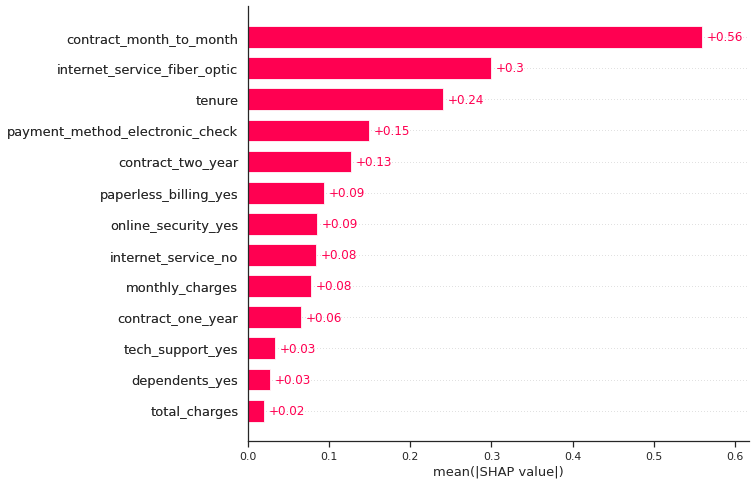

In [111]:
shap.plots.bar(shap_values, max_display=20)

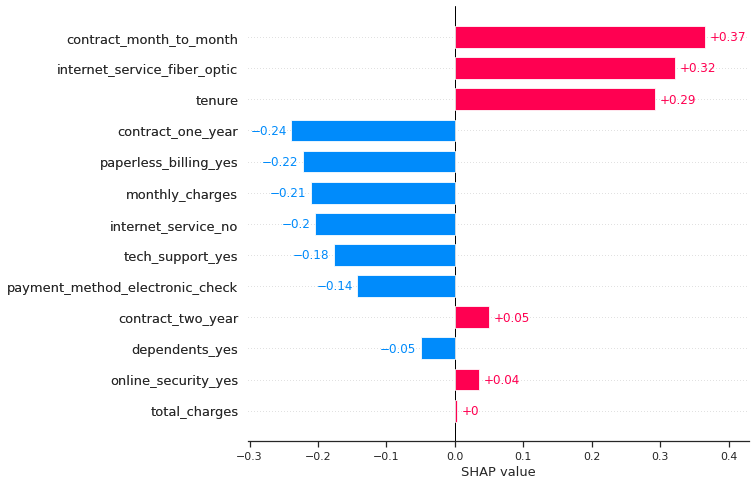

In [112]:
shap.plots.bar(shap_values[1], max_display=20)

### Beeswarm Plot

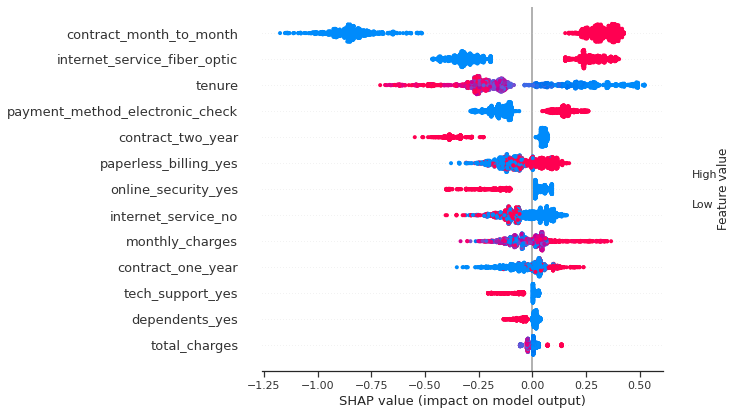

In [114]:
shap.plots.beeswarm(shap_values, max_display=20)

### Decision Plot

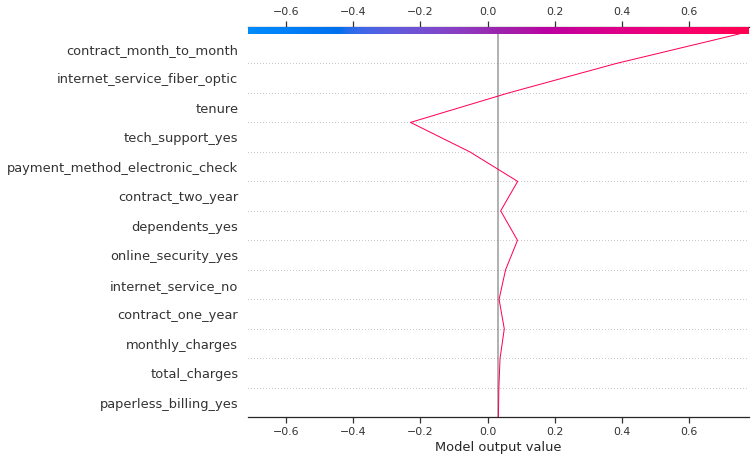

In [141]:
shap.decision_plot(explainer.expected_value, shap_values.values[1], X_test_filter.columns)

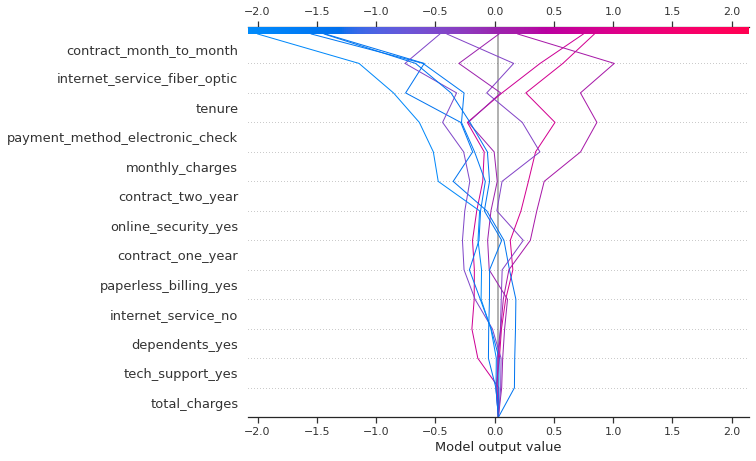

In [142]:
shap.decision_plot(explainer.expected_value, shap_values.values[:10], X_test_filter.columns)

### Scatter Plot

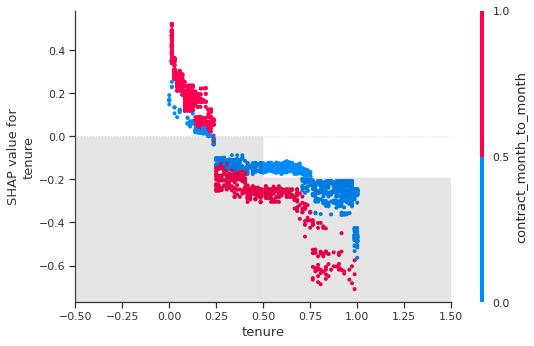

In [147]:
shap.plots.scatter(shap_values[:, 'tenure'], color=shap_values)

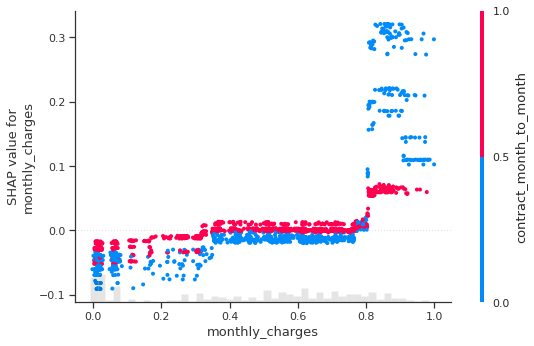

In [148]:
shap.plots.scatter(shap_values[:, 'monthly_charges'], color=shap_values)

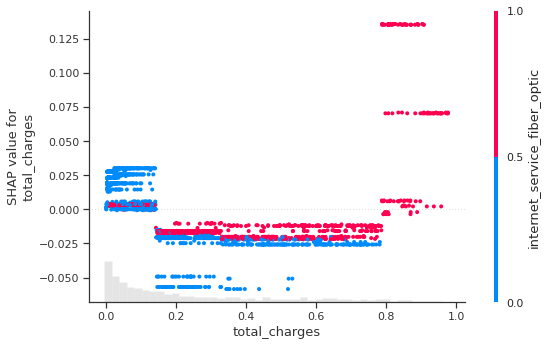

In [149]:
shap.plots.scatter(shap_values[:, 'total_charges'], color=shap_values)

### Waterfall Plot

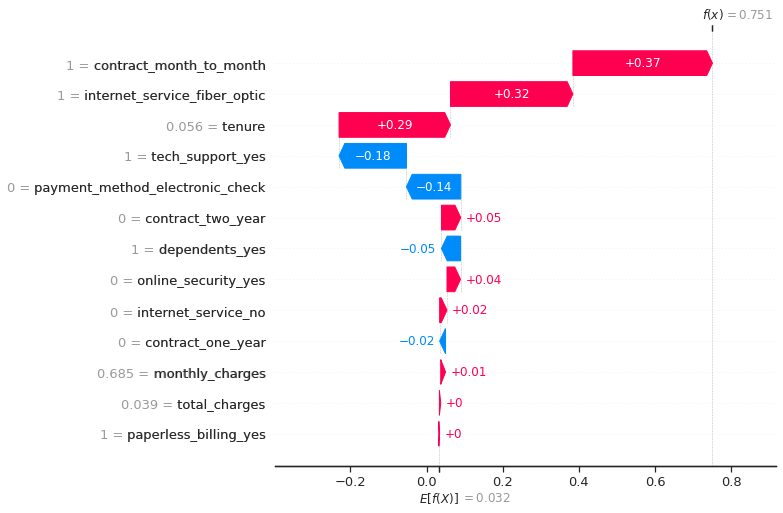

In [129]:
shap.plots.waterfall(shap_values[1], max_display=20)

### Force Plot

In [135]:
print('actual\t\t:', y_test_model[1])
print('predicted\t:', y_pred[1])

shap.initjs()
shap.plots.force(explainer.expected_value, shap_values.values[1,:], X_test_filter.iloc[1,:])

actual		: 1
predicted	: 1


In [136]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values.values[:100,:], X_test_filter.iloc[:100,:])

# REF

[Hyperparameter Tuning with Bayesian Optimization](https://www.analyticsvidhya.com/blog/2021/05/bayesian-optimization-bayes_opt-or-hyperopt/)

[Plot SHAP with Flask](https://towardsdatascience.com/tutorial-on-displaying-shap-force-plots-in-python-html-4883aeb0ee7c)

# Model Evaluation

## Ref 1
**Precision**<br>
Intuitively speaking, if we have a 100% precise model, that means it could catch all True positive but there were NO False Positive.<br>
![Precision](https://i.stack.imgur.com/bSmbY.png)
<br><br>

**Recall**<br>
Intuitively speaking, if we have a 100% recall model, that means it did NOT miss any True Positive, in other words, there were NO False Negatives.<br>
![Recall](https://i.stack.imgur.com/J6EUS.png)
<br><br>

**Specificity (1-recall)**<br>
Intuitively speaking, if we have 100% specific model, that means it did NOT miss any True Negative, in other words, there were NO False Positives.<br>
![Specificity](https://i.stack.imgur.com/TE01E.png)
<br><br>

**Rule of Thumb**<br>
As a rule of thumb, if the cost of having False negative is high, we want to increase the model recall (sensitivity)

**Example**<br>
For instance, in fraud detection or sick patient detection, we don't want to label/predict a fraudulent transaction (True Positive) as non-fraudulent (False Negative). Also, we don't want to label/predict a contagious sick patient (True Positive) as not sick (False Negative).
<br><br>
This is because the consequences will be worse than a False Positive (incorrectly labeling a a harmless transaction as fraudulent or a non-contagious patient as contagious).
<br><br>
On the other hand, if the cost of having False Positive is high, then we want to increase the model specificity and precision!.
<br><br>
For instance, in email spam detection, we don't want to label/predict a non-spam email (True Negative) as spam (False Positive). On the other hand, failing to label a spam email as spam (False Negative) is less costly.
<br><br>
ref: [stackoverflow](https://stackoverflow.com/questions/44172162/f1-score-vs-roc-auc)

## Ref 2
https://neptune.ai/blog/evaluation-metrics-binary-classification

https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

**F1 Score**<br>
Simply put, it combines precision and recall into one metric by calculating the harmonic mean between those two. It is actually a special case of the more general function F beta:<br>
![f1score](https://i1.wp.com/neptune.ai/wp-content/uploads/fbeta_eq.png?fit=604%2C88&ssl=1)
<br><br>

When choosing beta in your F-beta score the more you care about recall over precision the higher beta you should choose. For example, with F1 score we care equally about recall and precision with F2 score, recall is twice as important to us.
<br><br>

![img](https://i0.wp.com/neptune.ai/wp-content/uploads/f_by_beta.png?fit=933%2C518&ssl=1)

With 0<beta<1 we care more about precision and so the higher the threshold the higher the F beta score. When beta>1 our optimal threshold moves toward lower thresholds and with beta=1 it is somewhere in the middle.